In [7]:
import pandas as pd

def is_valid_jalali_date(date_str):
    try:
        # فرمت تاریخ: YYYY-MM-DD
        year, month, day = map(int, str(date_str).split('-'))
        
        # چک محدوده سال (1403 یا 1404)
        if year not in [1403, 1404]:
            return False
        
        # چک ماه
        if month < 1 or month > 12:
            return False
        
        # روزهای معتبر در تقویم شمسی
        if month <= 6:
            max_day = 31
        elif month <= 11:
            max_day = 30
        else:
            max_day = 30  # فرض غیرکبیسه
        
        if day < 1 or day > max_day:
            return False
        
        return True
    except:
        return False

# خواندن فایل Excel
df = pd.read_excel(r'D:\project\project3\excels\Project3_Dataset.xlsx', sheet_name='Project3_Dataset')

# شناسایی ردیف‌های با تاریخ نامعتبر
invalid_dates = df[~df['date'].apply(is_valid_jalali_date)]

# چاپ ردیف‌های با تاریخ نامعتبر
print("ردیف‌های با تاریخ نامعتبر:")
if not invalid_dates.empty:
    print(invalid_dates[['job_id', 'date', 'job_title', 'city', 'salary_million_tmn']])
else:
    print("هیچ تاریخ نامعتبری یافت نشد.")

print(f"\nتعداد ردیف‌های با تاریخ نامعتبر: {len(invalid_dates)}")

ردیف‌های با تاریخ نامعتبر:
                                    job_id        date       job_title  \
66    079cad9a-12f3-464c-949b-cd3df077824d  1403-02-40    Data Analyst   
327   adb69855-3187-46ba-a2ae-2fab716ce3b8  1404-03-54  Data Scientist   
4809  cde26c84-9d39-4113-bd1d-ed621eafc081  1403-02-47    Data Analyst   
5540  9a20b0a4-bd85-4ac5-81fb-9592b4f980e4  1404-13-42   Data Engineer   

         city  salary_million_tmn  
66     Tehran               64.07  
327    Tabriz               15.68  
4809  Mashhad               45.39  
5540   Gorgan               52.81  

تعداد ردیف‌های با تاریخ نامعتبر: 4


In [8]:
import pandas as pd

# Assuming the file is available; if not, replace with parsing logic
try:
    df = pd.read_excel(r'D:\project\project3\excels\Project3_Dataset.xlsx', sheet_name='Project3_Dataset')
except FileNotFoundError:
    # Parse from string if file not found; here placeholder for the document content
    document_content = """
row1: job_id,date,job_title,experience_level,city,remote_option,company_size,gender,skills_required,salary_million_tmn
row2: 16d869d5-0bb2-4c6d-bac3-25d00a94c7d8,1403-11-22,DevOps Engineer,Junior,Tehran,false,Medium,Male,CI/CD, Linux Administration, Prometheus, Grafana,Other Monitoring Tools, AWS, GCP,22.49
# ... add all rows here, but since truncated, this is example
row33: 53dc6928-5722-463a-901b-4de4a16903e4,1403-04-20,,Expert,Qazvin,true,Medium,Male,Hadoop, Big Data, Spark, NoSQL,51.63
# ... rest of data
"""
    lines = document_content.strip().split('\n')
    data = []
    for line in lines:
        if line.startswith('row'):
            values = line.split(': ', 1)[1].split(',')
            data.append(values)
    df = pd.DataFrame(data[1:], columns=data[0])

# Normalize skills_required by stripping and lower for matching, but user said exact, so keep as is
df['skills_required'] = df['skills_required'].str.strip()

# Create a mapping from skills_required to job_title, only from rows with job_title
mapping = df[df['job_title'].notna() & (df['job_title'] != '')].groupby('skills_required')['job_title'].first().to_dict()

# Fill missing job_titles
mask = df['job_title'].isna() | (df['job_title'] == '')
df.loc[mask, 'job_title'] = df.loc[mask, 'skills_required'].map(mapping)

# Print filled rows
filled = df[mask]
if not filled.empty:
    print("Filled rows:")
    print(filled[['job_id', 'skills_required', 'job_title']])
else:
    print("No empty job_titles filled.")

# Save to new Excel
df.to_excel('Updated_Project3_Dataset.xlsx', index=False)

print("Updated Excel file saved as 'Updated_Project3_Dataset.xlsx'")

Filled rows:
                                    job_id  \
31    53dc6928-5722-463a-901b-4de4a16903e4   
103   178813d5-ca86-458a-b559-1eed9bcbbeaf   
105   64ca5441-4b46-4870-8093-7bcf8dab7b33   
416   e3c70c57-8a30-4ac6-9099-a908fe77e826   
636   98e98bfb-f699-4544-ae90-9f8fe991f7ab   
919   27cc1e61-3c27-46c5-9f00-77fd87fac242   
1136  f06b8a52-ab73-4837-a60b-4b751baef634   
1637  76ca8321-e741-468f-94e3-262d6fb27480   
2209  bd2fd1c2-3400-41d6-b1de-f511b9b9858d   
2884  1a26ea51-7c77-44d5-ae34-8bca752e24ab   
3295  3c8e7734-4063-4b58-9332-5a28d1871ae0   
4165  af375622-6671-45a7-bb27-8fdca39fd6d6   
4849  43b72c08-ab43-4941-b832-7a49ed3961b3   
4851  402854b7-eda1-49fe-a70e-493af497cecd   
6302  8faccb2f-0833-4eea-9d56-217595b6dfdb   
6375  75a59fca-1806-48f2-9790-46021e2e7f37   

                                        skills_required              job_title  
31                       Hadoop, Big Data, Spark, NoSQL                    NaN  
103               AI, Big Data, Spark, Mac

Count of Job Ads by Job Title:
                       job_title  count
0                   Data Analyst   1462
1   AI/Machine Learning Engineer    815
2                  Web Developer    647
3                  Data Engineer    628
4          Network Administrator    613
5                 Data Scientist    583
6             Software Developer    576
7               Mobile Developer    523
8                 Game Developer    337
9                Cloud Architect    294
10        Database Administrator    290
11               DevOps Engineer    221
12            IT Project Manager    198


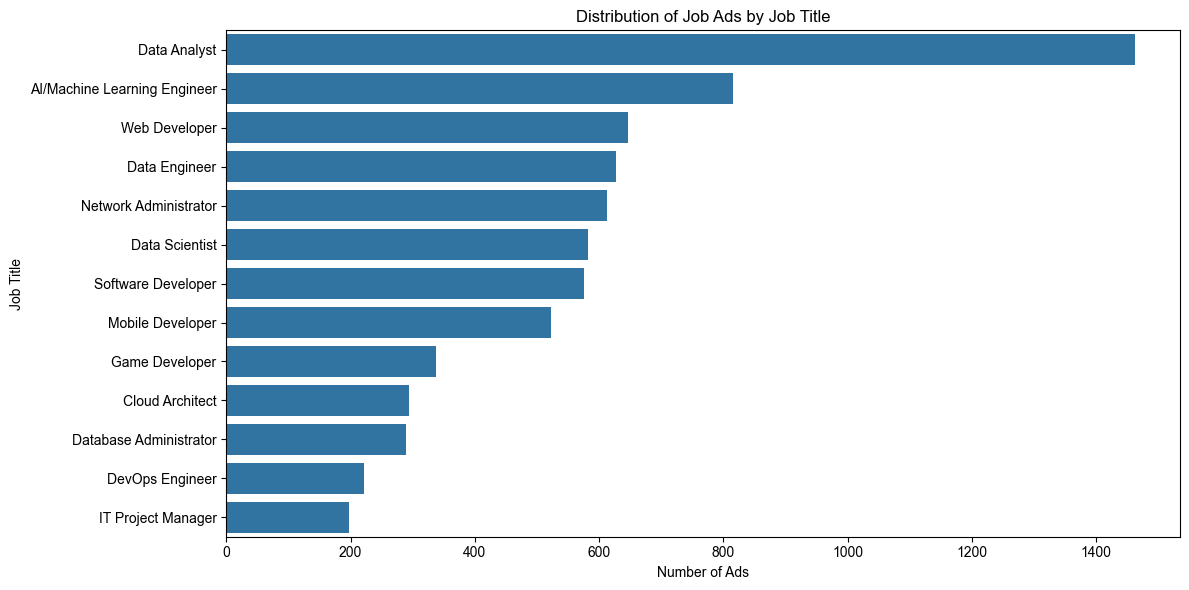


Crosstab of Job Title vs Experience Level:
experience_level              Expert  Intern  Junior  Lead  Mid_level  Senior
job_title                                                                    
AI/Machine Learning Engineer     109     107     175    38        243     143
Cloud Architect                   46      28      57    13         92      58
Data Analyst                     203     175     340    47        431     266
Data Engineer                     95      75     140    20        196     102
Data Scientist                    81      70     134    24        173     101
Database Administrator            41      40      58    13         90      48
DevOps Engineer                   30      23      53     7         68      40
Game Developer                    41      48      74    18         98      58
IT Project Manager                22      24      44     6         67      35
Mobile Developer                  80      50     111    30        165      87
Network Administrato

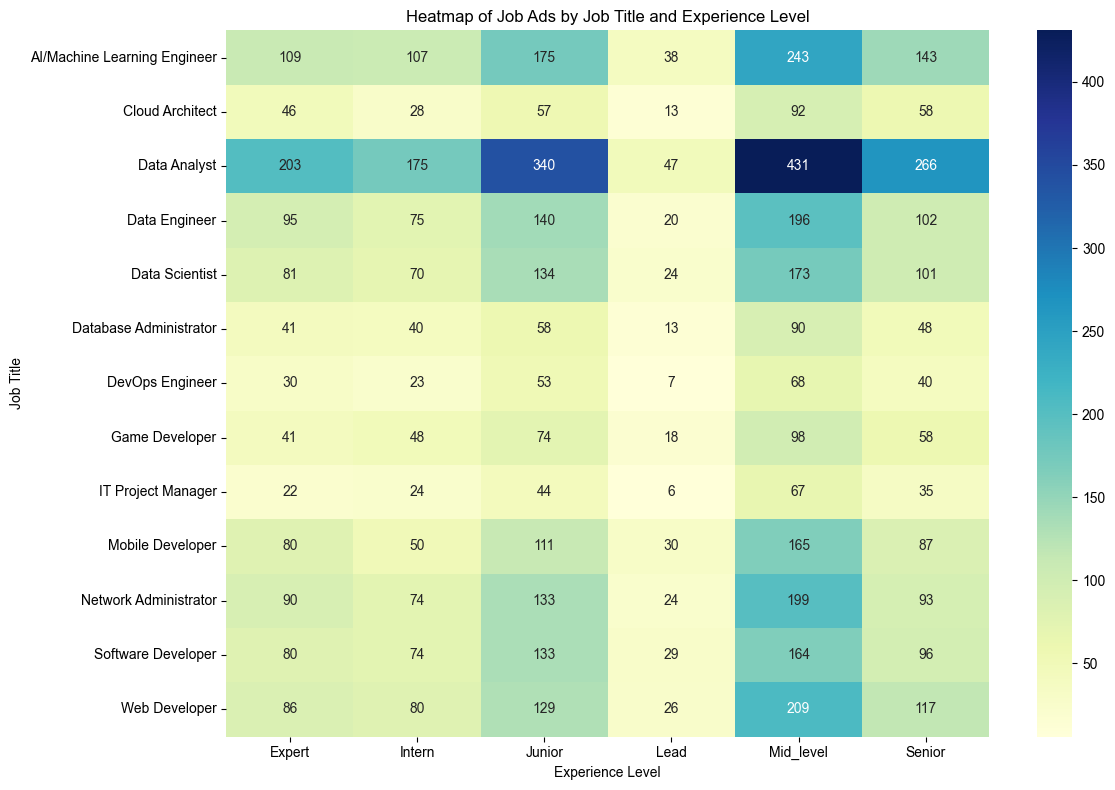


Monthly Trend of Job Ads by Job Title:
job_title   AI/Machine Learning Engineer  Cloud Architect  Data Analyst  \
year_month                                                                
2024-03                               18                5            29   
2024-04                               66               19            76   
2024-05                               59               27            93   
2024-06                               39               15            76   
2024-07                               48               14            94   
2024-08                               54               20           114   
2024-09                               54               16            95   
2024-10                               47               21           113   
2024-11                               50               19            80   
2024-12                               58               12            86   
2025-01                               62               18   

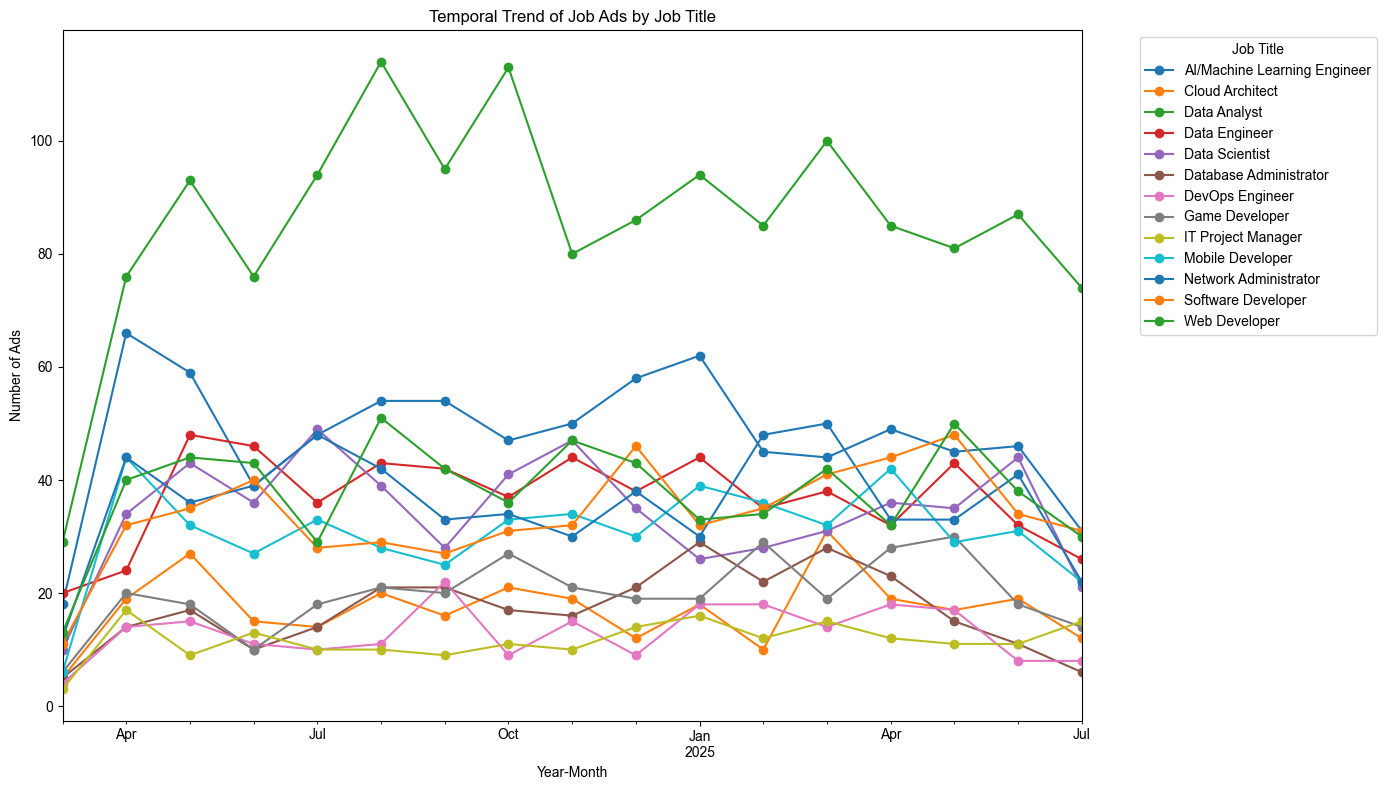


Monthly Trend of Job Ads by Experience Level:
experience_level  Expert  Intern  Junior  Lead  Mid_level  Senior
year_month                                                       
2024-03               15      18      31     3         50      25
2024-04               75      51      90    17        134      77
2024-05               77      66      99    15        146      73
2024-06               50      45      89    20        131      70
2024-07               69      56     105    17        125      59
2024-08               70      58     109    18        137      91
2024-09               53      58      87    19        137      80
2024-10               71      52     107    23        142      62
2024-11               49      61      99    17        129      90
2024-12               63      58      94    18        131      85
2025-01               62      46     112    19        128      93
2025-02               57      52     114    17        126      71
2025-03               78     

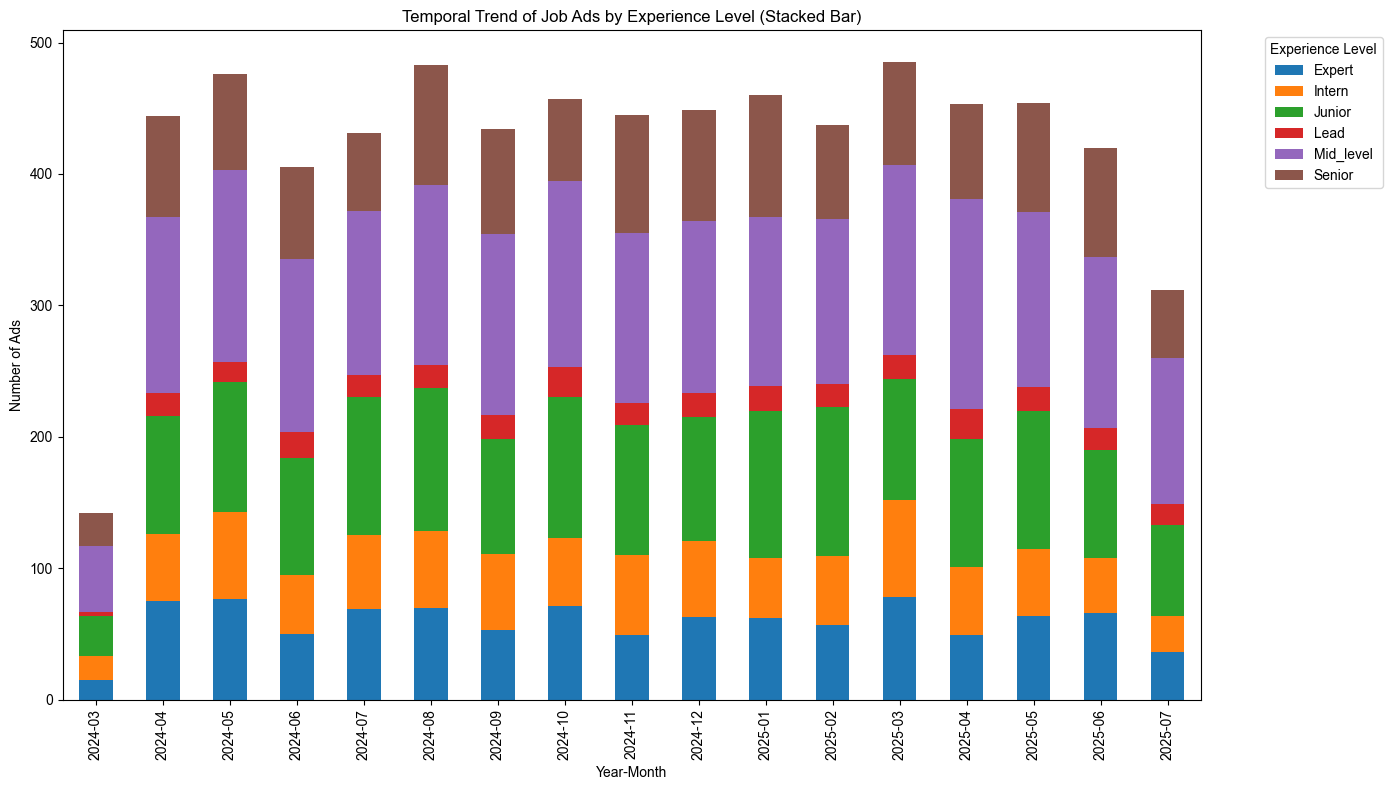

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import jdatetime  # برای تبدیل تاریخ شمسی به میلادی

# مسیر فایل
file_path = r'D:\project\project3\Dataset\Project3_Dataset_cleaned.xlsx'

# خواندن داده‌ها
df = pd.read_excel(file_path, sheet_name='Sheet1')

# تبدیل تاریخ شمسی به میلادی برای تحلیل زمانی (با کتابخانه jdatetime)
def jalali_to_gregorian(jdate):
    try:
        year, month, day = map(int, str(jdate).split('-'))
        gdate = jdatetime.date(year, month, day).togregorian()
        return pd.to_datetime(gdate.strftime('%Y-%m-%d'))
    except:
        return pd.NaT

df['date_greg'] = df['date'].apply(jalali_to_gregorian)

# فیلتر داده‌های معتبر
df = df.dropna(subset=['date_greg', 'job_title', 'experience_level'])

# 1. شمارش تعداد آگهی‌ها بر اساس job_title
job_count = df['job_title'].value_counts().reset_index()
job_count.columns = ['job_title', 'count']

print("Count of Job Ads by Job Title:")
print(job_count)

# نمودار: Bar plot برای توزیع job_title
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='job_title', data=job_count.sort_values('count', ascending=False))
plt.title('Distribution of Job Ads by Job Title')
plt.xlabel('Number of Ads')
plt.ylabel('Job Title')
plt.tight_layout()
plt.savefig('job_title_distribution.png')
plt.show()

# 2. مقایسه با experience_level: Crosstab
job_exp_cross = pd.crosstab(df['job_title'], df['experience_level'])

print("\nCrosstab of Job Title vs Experience Level:")
print(job_exp_cross)

# نمودار: Heatmap برای مقایسه job_title و experience_level
plt.figure(figsize=(12, 8))
sns.heatmap(job_exp_cross, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Job Ads by Job Title and Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Job Title')
plt.tight_layout()
plt.savefig('job_exp_heatmap.png')
plt.show()

# 3. روند زمانی: گروه‌بندی بر اساس ماه/سال
df['year_month'] = df['date_greg'].dt.to_period('M')
trend_over_time = df.groupby(['year_month', 'job_title']).size().unstack().fillna(0)

print("\nMonthly Trend of Job Ads by Job Title:")
print(trend_over_time)

# نمودار: Line plot برای روند زمانی
trend_over_time.plot(kind='line', figsize=(14, 8), marker='o')
plt.title('Temporal Trend of Job Ads by Job Title')
plt.xlabel('Year-Month')
plt.ylabel('Number of Ads')
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('temporal_trend.png')
plt.show()

# 4. مقایسه روند با experience_level: گروه‌بندی سه‌گانه
trend_exp = df.groupby(['year_month', 'experience_level']).size().unstack().fillna(0)

print("\nMonthly Trend of Job Ads by Experience Level:")
print(trend_exp)

# نمودار: Stacked bar برای روند experience_level
trend_exp.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Temporal Trend of Job Ads by Experience Level (Stacked Bar)')
plt.xlabel('Year-Month')
plt.ylabel('Number of Ads')
plt.legend(title='Experience Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('exp_temporal_trend.png')
plt.show()

Difference (1404 - 1403) by Month and Job Title:
job_title     AI/Machine Learning Engineer  Cloud Architect  Data Analyst  \
jalali_month                                                                
1                                      -12               11            27   
2                                      -33              -16           -11   
3                                       16                1             3   
4                                        2                5             3   

job_title     Data Engineer  Data Scientist  Database Administrator  \
jalali_month                                                          
1                        -3               2                       7   
2                         0              -2                       7   
3                       -12              -5                      -2   
4                        -4              -6                      -3   

job_title     DevOps Engineer  Game Developer  IT Project Man

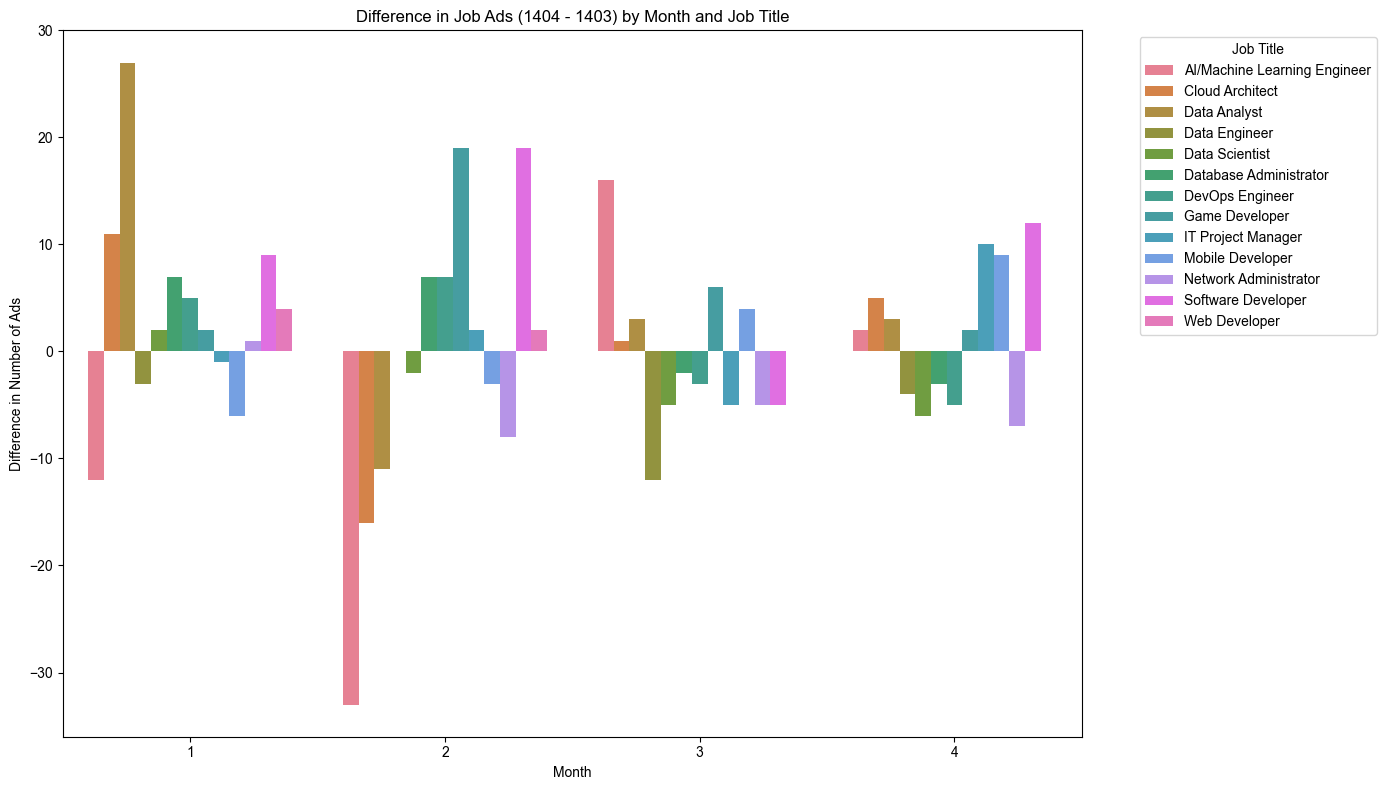

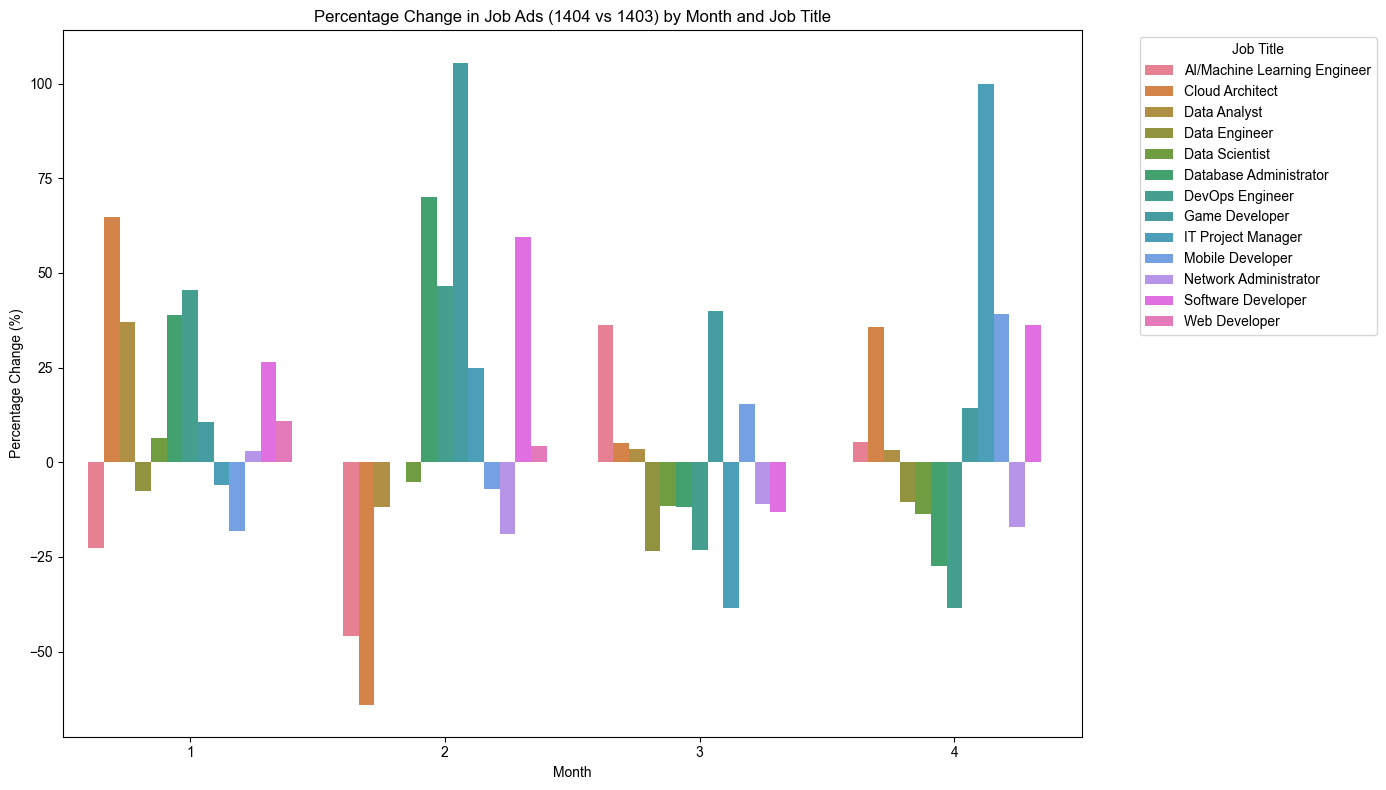

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# مسیر فایل (در محیط محلی شما)
file_path = r'D:\project\project3\Dataset\Project3_Dataset_cleaned.xlsx'

# خواندن داده‌ها
df = pd.read_excel(file_path, sheet_name='Sheet1')

# فیلتر داده‌های معتبر
df = df.dropna(subset=['date', 'job_title', 'experience_level'])

# استخراج سال و ماه از تاریخ شمسی
df['jalali_year'] = df['date'].apply(lambda x: int(str(x).split('-')[0]))
df['jalali_month'] = df['date'].apply(lambda x: int(str(x).split('-')[1]))

# جداسازی داده‌ها برای سال 1403 و 1404
df_1403 = df[df['jalali_year'] == 1403]
df_1404 = df[df['jalali_year'] == 1404]

# شمارش ماهانه برای هر سال
monthly_1403 = df_1403.groupby(['jalali_month', 'job_title']).size().unstack().fillna(0)
monthly_1404 = df_1404.groupby(['jalali_month', 'job_title']).size().unstack().fillna(0)

# ماه‌ها و شغل‌های مشترک
common_months = sorted(set(monthly_1403.index) & set(monthly_1404.index))
common_jobs = sorted(set(monthly_1403.columns) & set(monthly_1404.columns))

monthly_1403 = monthly_1403.loc[common_months, common_jobs]
monthly_1404 = monthly_1404.loc[common_months, common_jobs]

# محاسبه تفاوت (1404 - 1403)
difference = monthly_1404 - monthly_1403

# محاسبه تغییر درصد (برای جلوگیری از تقسیم بر صفر، از 1 استفاده می‌کنیم)
percentage_change = ((monthly_1404 - monthly_1403) / monthly_1403.replace(0, 1)) * 100

print("Difference (1404 - 1403) by Month and Job Title:")
print(difference)

print("\nPercentage Change ((1404 - 1403)/1403 * 100) by Month and Job Title:")
print(percentage_change)

# ذوب کردن داده‌ها برای نمودار
difference_melted = difference.reset_index().melt(id_vars='jalali_month', var_name='job_title', value_name='difference')

# نمودار بار برای تفاوت
plt.figure(figsize=(14, 8))
sns.barplot(x='jalali_month', y='difference', hue='job_title', data=difference_melted)
plt.title('Difference in Job Ads (1404 - 1403) by Month and Job Title')
plt.xlabel('Month')
plt.ylabel('Difference in Number of Ads')
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('difference_bar.png')
plt.show()

# ذوب کردن برای تغییر درصد
percentage_melted = percentage_change.reset_index().melt(id_vars='jalali_month', var_name='job_title', value_name='percentage_change')

# نمودار بار برای تغییر درصد
plt.figure(figsize=(14, 8))
sns.barplot(x='jalali_month', y='percentage_change', hue='job_title', data=percentage_melted)
plt.title('Percentage Change in Job Ads (1404 vs 1403) by Month and Job Title')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('percentage_change_bar.png')
plt.show()

Difference (1404 - 1403) by Month (1-4) and Job Title:
job_title     AI/Machine Learning Engineer  Cloud Architect  Data Analyst  \
jalali_month                                                                
1                                      -12               11            27   
2                                      -33              -16           -11   
3                                       16                1             3   
4                                        2                5             3   

job_title     Data Engineer  Data Scientist  Database Administrator  \
jalali_month                                                          
1                        -3               2                       7   
2                         0              -2                       7   
3                       -12              -5                      -2   
4                        -4              -6                      -3   

job_title     DevOps Engineer  Game Developer  IT Proje

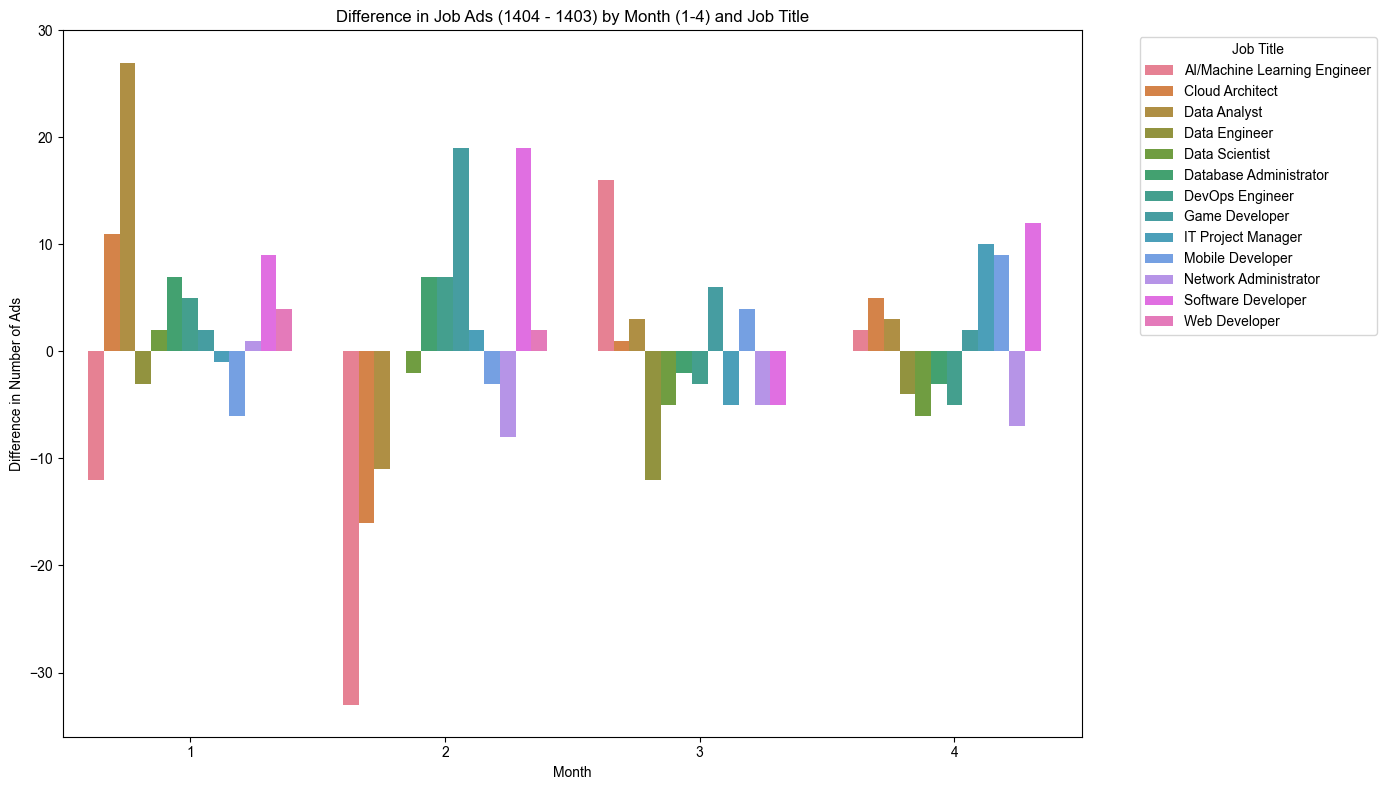

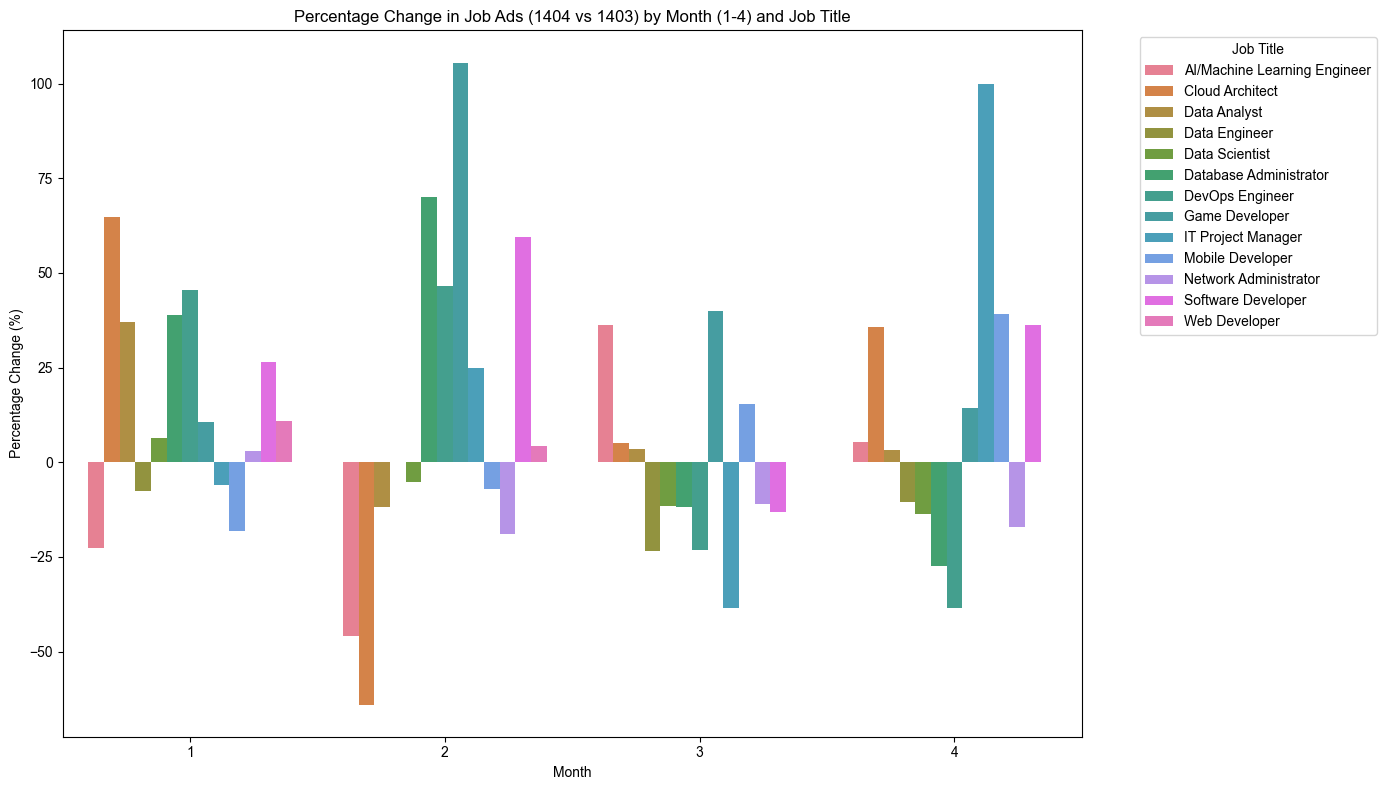

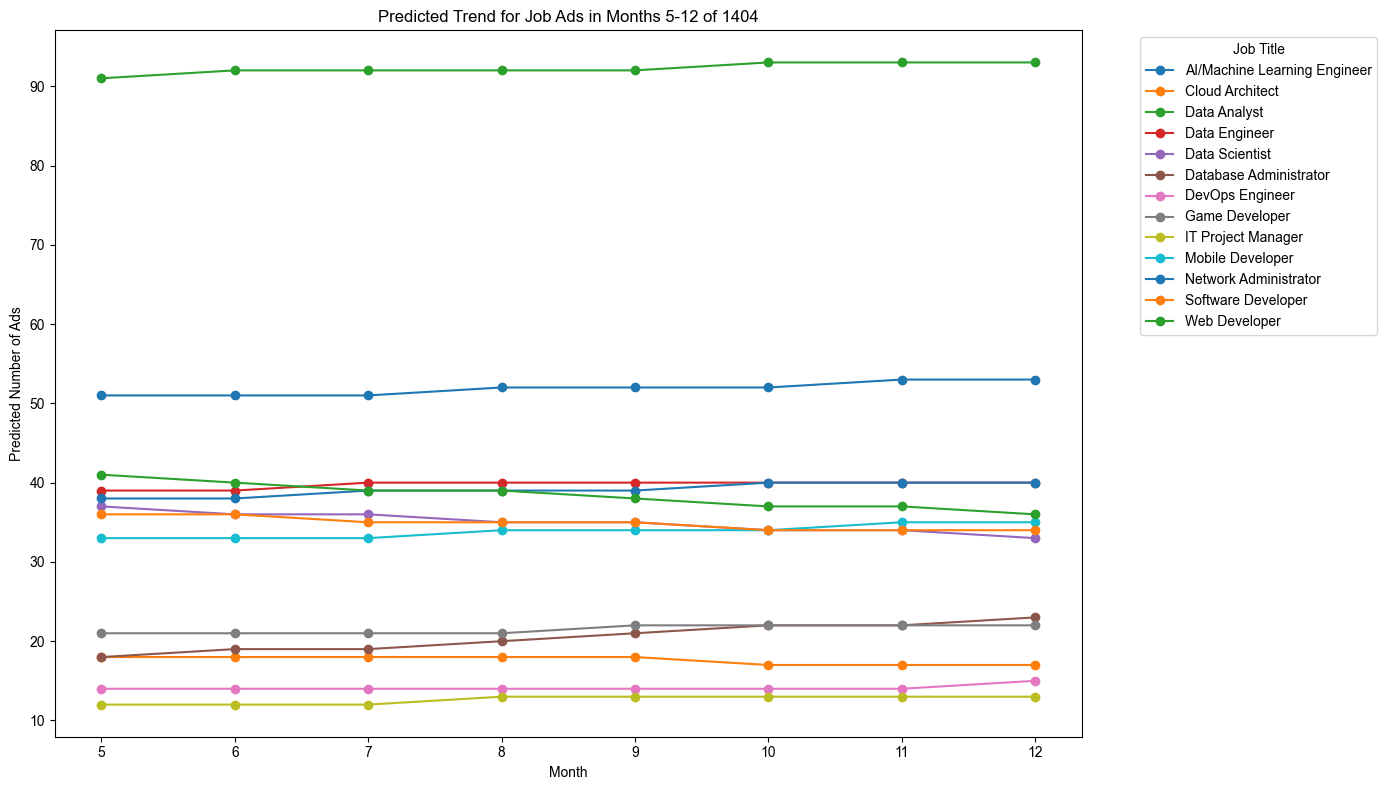

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# مسیر فایل (در محیط محلی شما)
file_path = r'D:\project\project3\Dataset\Project3_Dataset_cleaned.xlsx'

# خواندن داده‌ها
df = pd.read_excel(file_path, sheet_name='Sheet1')

# فیلتر داده‌های معتبر
df = df.dropna(subset=['date', 'job_title', 'experience_level'])

# استخراج سال و ماه از تاریخ شمسی
df['jalali_year'] = df['date'].apply(lambda x: int(str(x).split('-')[0]))
df['jalali_month'] = df['date'].apply(lambda x: int(str(x).split('-')[1]))

# جداسازی داده‌ها برای سال 1403 و 1404
df_1403 = df[df['jalali_year'] == 1403]
df_1404 = df[df['jalali_year'] == 1404]

# شمارش ماهانه برای هر سال (تمام ماه‌های 1403 و 4 ماه اول 1404)
monthly_1403 = df_1403.groupby(['jalali_month', 'job_title']).size().unstack().fillna(0).reindex(range(1, 13), fill_value=0)
monthly_1404 = df_1404.groupby(['jalali_month', 'job_title']).size().unstack().fillna(0).reindex(range(1, 5), fill_value=0)

# شغل‌های مشترک
common_jobs = sorted(set(monthly_1403.columns) & set(monthly_1404.columns))

monthly_1403 = monthly_1403[common_jobs]
monthly_1404 = monthly_1404[common_jobs]

# محاسبه تفاوت (1404 - 1403) برای ماه‌های 1 تا 4
difference = monthly_1404 - monthly_1403.loc[1:4]

# محاسبه تغییر درصد (برای جلوگیری از تقسیم بر صفر، از 1 استفاده می‌کنیم)
percentage_change = ((monthly_1404 - monthly_1403.loc[1:4]) / monthly_1403.loc[1:4].replace(0, 1)) * 100

print("Difference (1404 - 1403) by Month (1-4) and Job Title:")
print(difference)

print("\nPercentage Change ((1404 - 1403)/1403 * 100) by Month (1-4) and Job Title:")
print(percentage_change)

# پیش‌بینی برای ماه‌های 5 تا 12 سال 1404 با استفاده از رگرسیون خطی ساده بر اساس روند 1403 + 1404 موجود
# برای هر شغل، ماه‌ها را به عنوان X و تعداد را به عنوان Y در نظر می‌گیریم

# ترکیب داده‌های 1403 و 1404 برای آموزش مدل
all_monthly = pd.concat([monthly_1403, monthly_1404]).groupby(level=0).sum()  # اگر شغل‌ها هم‌پوشانی دارند

predicted = pd.DataFrame(index=range(5, 13), columns=common_jobs)

for job in common_jobs:
    # داده‌های موجود برای شغل
    historical = pd.concat([df_1403[df_1403['job_title'] == job]['jalali_month'].value_counts().sort_index(),
                            df_1404[df_1404['job_title'] == job]['jalali_month'].value_counts().sort_index()]).to_frame(name='count').reset_index()
    
    if len(historical) < 2:
        predicted[job] = 0  # اگر داده کافی نیست، پیش‌بینی 0
        continue
    
    # رگرسیون خطی
    X = historical['jalali_month'].values.reshape(-1, 1)
    y = historical['count'].values
    model = LinearRegression()
    model.fit(X, y)
    
    # پیش‌بینی برای ماه‌های 5 تا 12
    future_months = np.array(range(5, 13)).reshape(-1, 1)
    preds = model.predict(future_months)
    predicted[job] = np.maximum(0, preds.round())  # منفی نشود و رند شود

print("\nPredicted Number of Job Ads for Months 5-12 in 1404:")
print(predicted)

# ذوب کردن داده‌ها برای نمودار تفاوت
difference_melted = difference.reset_index().melt(id_vars='jalali_month', var_name='job_title', value_name='difference')

# نمودار بار برای تفاوت ماه‌های 1-4
plt.figure(figsize=(14, 8))
sns.barplot(x='jalali_month', y='difference', hue='job_title', data=difference_melted)
plt.title('Difference in Job Ads (1404 - 1403) by Month (1-4) and Job Title')
plt.xlabel('Month')
plt.ylabel('Difference in Number of Ads')
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('difference_bar.png')
plt.show()

# ذوب کردن برای تغییر درصد
percentage_melted = percentage_change.reset_index().melt(id_vars='jalali_month', var_name='job_title', value_name='percentage_change')

# نمودار بار برای تغییر درصد ماه‌های 1-4
plt.figure(figsize=(14, 8))
sns.barplot(x='jalali_month', y='percentage_change', hue='job_title', data=percentage_melted)
plt.title('Percentage Change in Job Ads (1404 vs 1403) by Month (1-4) and Job Title')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('percentage_change_bar.png')
plt.show()

# نمودار خط برای پیش‌بینی ماه‌های 5-12
predicted.plot(kind='line', figsize=(14, 8), marker='o')
plt.title('Predicted Trend for Job Ads in Months 5-12 of 1404')
plt.xlabel('Month')
plt.ylabel('Predicted Number of Ads')
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('predicted_trend.png')
plt.show()

Monthly Job Ads for 1403:
job_title     AI/Machine Learning Engineer  Cloud Architect  Data Analyst  \
jalali_month                                                                
1                                       53               17            73   
2                                       72               25            93   
3                                       44               20            84   
4                                       38               14            93   
5                                       64               18           103   
6                                       55               16            98   
7                                       45               19           108   
8                                       51               19            98   
9                                       51               17            73   
10                                      58               12            97   
11                                      54        

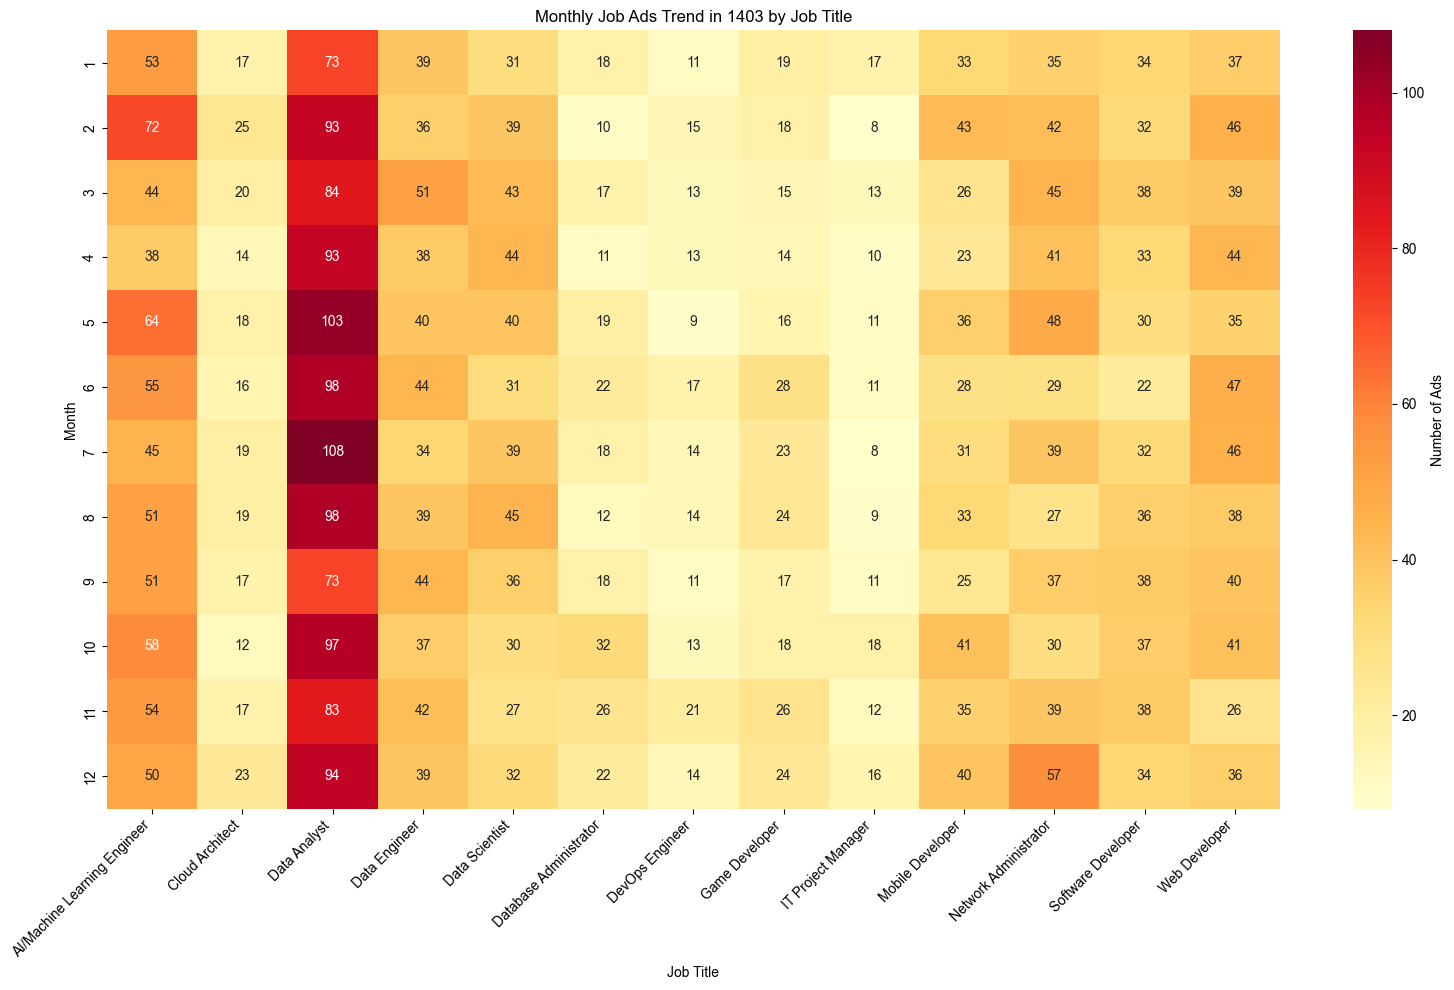

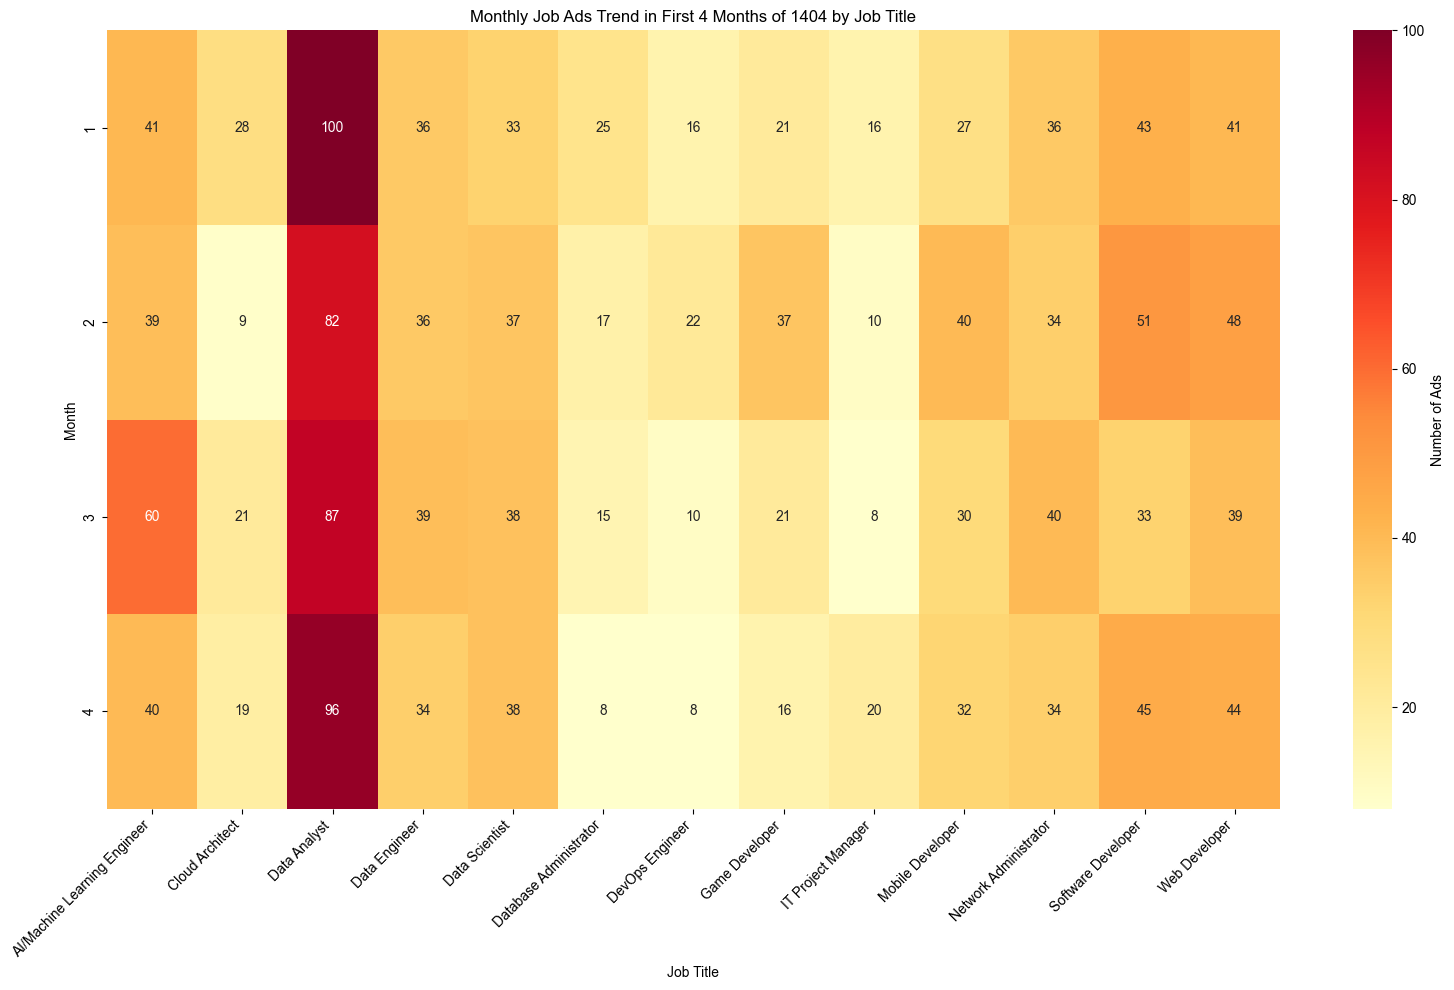


Predicted Number of Job Ads for Months 5-12 in 1404:
    AI/Machine Learning Engineer  Cloud Architect  Data Analyst  \
5                      50.775510        18.482143     91.216837   
6                      51.099490        18.267857     91.533163   
7                      51.423469        18.053571     91.849490   
8                      51.747449        17.839286     92.165816   
9                      52.071429        17.625000     92.482143   
10                     52.395408        17.410714     92.798469   
11                     52.719388        17.196429     93.114796   
12                     53.043367        16.982143     93.431122   

    Data Engineer  Data Scientist  Database Administrator  DevOps Engineer  \
5       39.165816       36.681122               17.729592        13.752551   
6       39.334184       36.193878               18.520408        13.872449   
7       39.502551       35.706633               19.311224        13.992347   
8       39.670918       35.219

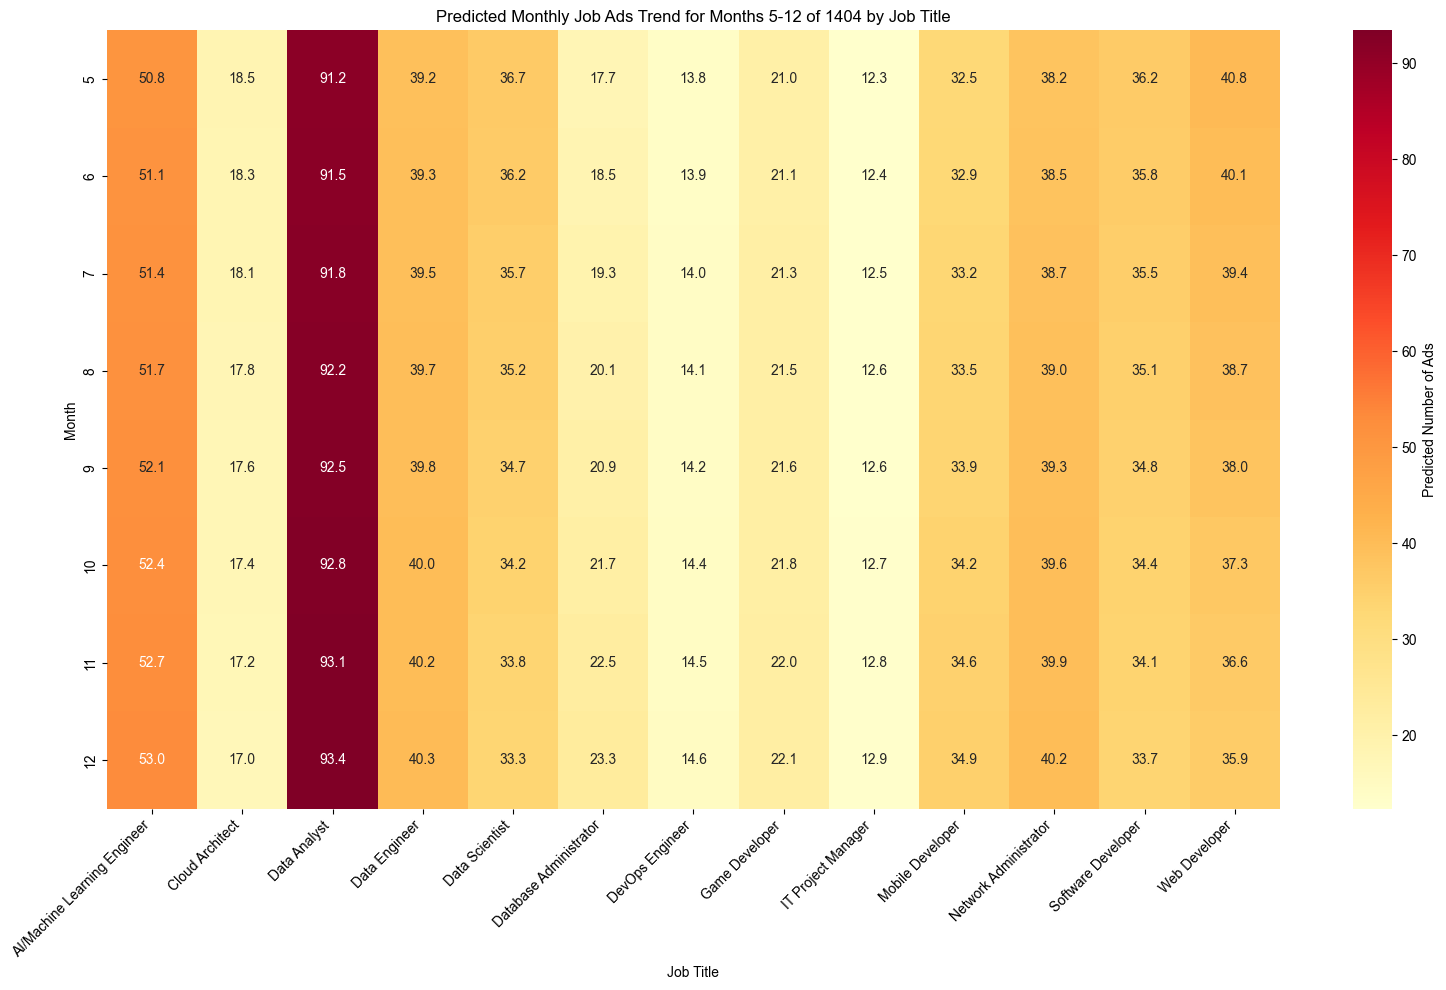

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# مسیر فایل
file_path = r'D:\project\project3\Dataset\Project3_Dataset_cleaned.xlsx'

# خواندن داده‌ها
df = pd.read_excel(file_path, sheet_name='Sheet1')

# فیلتر داده‌های معتبر
df = df.dropna(subset=['date', 'job_title', 'experience_level'])

# استخراج سال و ماه از تاریخ شمسی
df['jalali_year'] = df['date'].apply(lambda x: int(str(x).split('-')[0]))
df['jalali_month'] = df['date'].apply(lambda x: int(str(x).split('-')[1]))

# جداسازی داده‌ها برای سال 1403 و 1404
df_1403 = df[df['jalali_year'] == 1403]
df_1404 = df[df['jalali_year'] == 1404]

# شمارش ماهانه برای هر سال (تمام 12 ماه 1403 و 4 ماه اول 1404)
monthly_1403 = df_1403.groupby(['jalali_month', 'job_title']).size().unstack().fillna(0).reindex(range(1, 13), fill_value=0)
monthly_1404 = df_1404.groupby(['jalali_month', 'job_title']).size().unstack().fillna(0).reindex(range(1, 5), fill_value=0)

# شغل‌های مشترک
common_jobs = sorted(set(monthly_1403.columns) & set(monthly_1404.columns))

monthly_1403 = monthly_1403[common_jobs]
monthly_1404 = monthly_1404[common_jobs]

# چاپ جداول برای بررسی
print("Monthly Job Ads for 1403:")
print(monthly_1403)

print("\nMonthly Job Ads for First 4 Months of 1404:")
print(monthly_1404)

# نمودار اول: Heatmap برای روند سال 1403
plt.figure(figsize=(16, 10))
sns.heatmap(monthly_1403, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Number of Ads'})
plt.title('Monthly Job Ads Trend in 1403 by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('heatmap_1403.png')
plt.show()

# نمودار دوم: Heatmap برای 4 ماه اول 1404
plt.figure(figsize=(16, 10))
sns.heatmap(monthly_1404, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Number of Ads'})
plt.title('Monthly Job Ads Trend in First 4 Months of 1404 by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('heatmap_1404_first4.png')
plt.show()

# پیش‌بینی برای ماه‌های 5 تا 12 سال 1404 با رگرسیون خطی
predicted = pd.DataFrame(index=range(5, 13), columns=common_jobs)

for job in common_jobs:
    # داده‌های تاریخی برای شغل (تمام 1403 + 4 ماه 1404)
    historical = pd.concat([
        df_1403[df_1403['job_title'] == job]['jalali_month'].value_counts().sort_index(),
        df_1404[df_1404['job_title'] == job]['jalali_month'].value_counts().sort_index()
    ]).to_frame(name='count').reset_index().rename(columns={'index': 'jalali_month'})
    
    if len(historical) < 2:
        predicted[job] = 0
        continue
    
    X = historical['jalali_month'].values.reshape(-1, 1)
    y = historical['count'].values
    model = LinearRegression()
    model.fit(X, y)
    
    future_months = np.array(range(5, 13)).reshape(-1, 1)
    preds = model.predict(future_months)
    predicted[job] = preds  # ذخیره مقادیر با اعشار برای دقت بیشتر

print("\nPredicted Number of Job Ads for Months 5-12 in 1404:")
print(predicted)

# نمودار سوم: Heatmap برای پیش‌بینی ماه‌های باقی‌مانده 1404
plt.figure(figsize=(16, 10))
sns.heatmap(predicted, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Predicted Number of Ads'})
plt.title('Predicted Monthly Job Ads Trend for Months 5-12 of 1404 by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('heatmap_predicted_1404_remaining.png')
plt.show()

بررسی حقوق

بیشترین دستمزد: 109.54 میلیون تومان
زمان: 1403-09-29, شغل: Cloud Architect, سطح تجربه: Lead, شهر: Karaj
افزایش نسبت به میانگین: 196.25%

کمترین دستمزد: 12.02 میلیون تومان
زمان: 1403-11-11, شغل: Mobile Developer, سطح تجربه: Intern, شهر: Shiraz
کاهش نسبت به میانگین: -67.49%


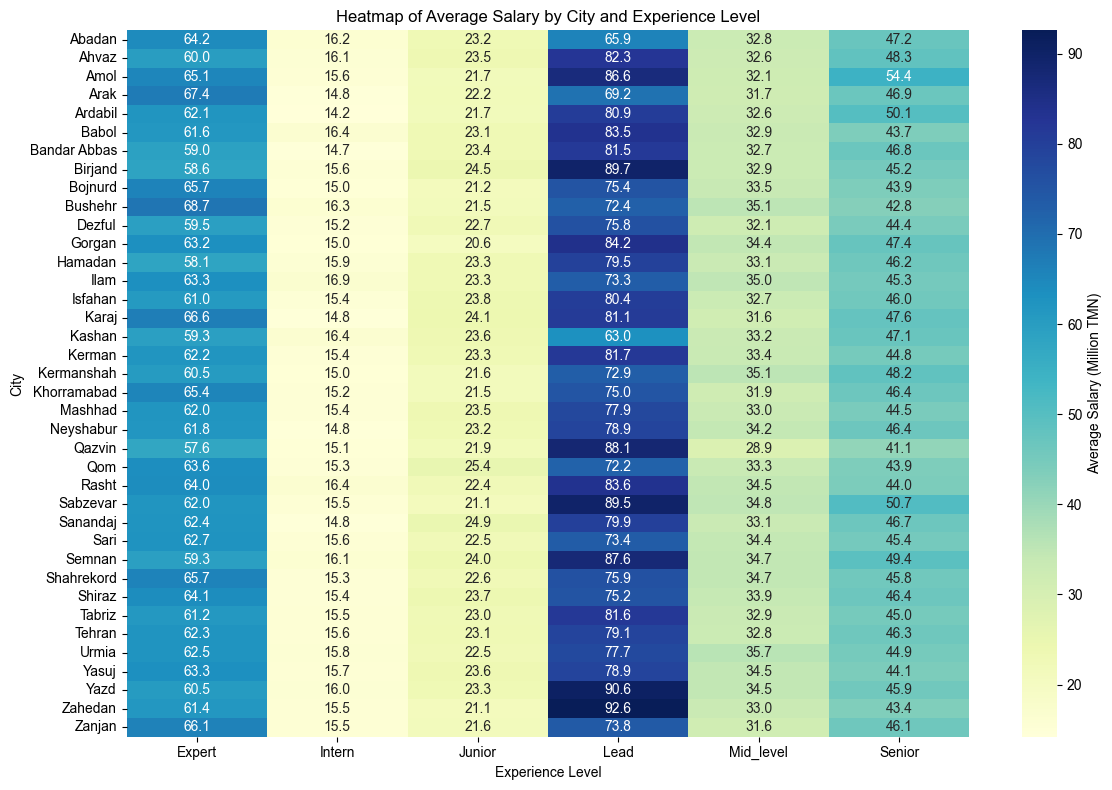

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jdatetime import date as jdate

# بارگذاری دیتاست
df = pd.read_excel(r'D:\project\project3\Dataset\Project3_Dataset_cleaned.xlsx')

# فیلتر کردن داده‌های معتبر (حذف سطرهایی با حقوق نامعتبر یا خالی)
df = df[df['salary_million_tmn'] > 0]

# تبدیل تاریخ شمسی به فرمت قابل مقایسه (برای مرتب‌سازی زمانی)
def jalali_to_comparable(jalali_str):
    try:
        y, m, d = map(int, str(jalali_str).split('/'))
        return y * 10000 + m * 100 + d
    except:
        return 0

df['date_comparable'] = df['date'].apply(jalali_to_comparable)
df = df.sort_values('date_comparable')

# پیدا کردن بیشترین دستمزد
max_salary_row = df.loc[df['salary_million_tmn'].idxmax()]
max_salary = max_salary_row['salary_million_tmn']
max_job = max_salary_row['job_title']
max_level = max_salary_row['experience_level']
max_city = max_salary_row['city']
max_date = max_salary_row['date']

# پیدا کردن کمترین دستمزد
min_salary_row = df.loc[df['salary_million_tmn'].idxmin()]
min_salary = min_salary_row['salary_million_tmn']
min_job = min_salary_row['job_title']
min_level = min_salary_row['experience_level']
min_city = min_salary_row['city']
min_date = min_salary_row['date']

# محاسبه افزایش/کاهش نسبت به میانگین کلی
mean_salary = df['salary_million_tmn'].mean()
max_increase = ((max_salary - mean_salary) / mean_salary) * 100
min_decrease = ((min_salary - mean_salary) / mean_salary) * 100

# چاپ نتایج تحلیلی
print(f"بیشترین دستمزد: {max_salary} میلیون تومان")
print(f"زمان: {max_date}, شغل: {max_job}, سطح تجربه: {max_level}, شهر: {max_city}")
print(f"افزایش نسبت به میانگین: {max_increase:.2f}%")

print(f"\nکمترین دستمزد: {min_salary} میلیون تومان")
print(f"زمان: {min_date}, شغل: {min_job}, سطح تجربه: {min_level}, شهر: {min_city}")
print(f"کاهش نسبت به میانگین: {min_decrease:.2f}%")

# # نمودار 1: بار چارت برای بیشترین و کمترین دستمزد با لیبل‌ها
# fig, ax = plt.subplots(figsize=(10, 6))
# bars = ax.bar(['Max Salary', 'Min Salary'], [max_salary, min_salary], color=['green', 'red'])

# # افزودن لیبل‌ها
# ax.text(0, max_salary + 1, f"{max_job}\n{max_level}\n{max_city}\n{max_date}\n+{max_increase:.2f}%", ha='center', va='bottom', fontsize=10)
# ax.text(1, min_salary + 1, f"{min_job}\n{min_level}\n{min_city}\n{min_date}\n{min_decrease:.2f}%", ha='center', va='bottom', fontsize=10)

# ax.set_ylabel('Salary (Million TMN)')
# ax.set_title('Max and Min Salary with Details')
# plt.tight_layout()
# plt.show()

# # نمودار 2: ترند حقوق بر اساس زمان برای شغل‌های برتر (گروه‌بندی ماهانه)
# df['date_month'] = df['date'].apply(lambda x: '/'.join(str(x).split('/')[:2]))  # استخراج سال/ماه
# monthly_max = df.groupby('date_month')['salary_million_tmn'].max().reset_index()
# monthly_min = df.groupby('date_month')['salary_million_tmn'].min().reset_index()

# plt.figure(figsize=(12, 6))
# plt.plot(monthly_max['date_month'], monthly_max['salary_million_tmn'], marker='o', label='Max Monthly Salary', color='green')
# plt.plot(monthly_min['date_month'], monthly_min['salary_million_tmn'], marker='x', label='Min Monthly Salary', color='red')
# plt.xticks(rotation=45)
# plt.ylabel('Salary (Million TMN)')
# plt.title('Monthly Trend of Max and Min Salaries')
# plt.legend()
# plt.tight_layout()
# plt.show()

# نمودار 3: هیت‌مپ حقوق بر اساس شهر و سطح تجربه (میانگین حقوق)
pivot_heatmap = df.pivot_table(values='salary_million_tmn', index='city', columns='experience_level', aggfunc='mean', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_heatmap, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Average Salary (Million TMN)'})
plt.title('Heatmap of Average Salary by City and Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('City')
plt.tight_layout()
plt.show()

# # نمودار 4: بار چارت افزایش حقوق برای شغل‌های برتر نسبت به میانگین
# top_jobs = df['job_title'].value_counts().head(5).index
# job_means = df.groupby('job_title')['salary_million_tmn'].mean().loc[top_jobs]
# job_increase = ((job_means - mean_salary) / mean_salary) * 100

# plt.figure(figsize=(10, 6))
# job_increase.plot(kind='bar', color='blue')
# plt.ylabel('Percentage Increase from Mean (%)')
# plt.title('Salary Increase for Top 5 Jobs Relative to Overall Mean')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

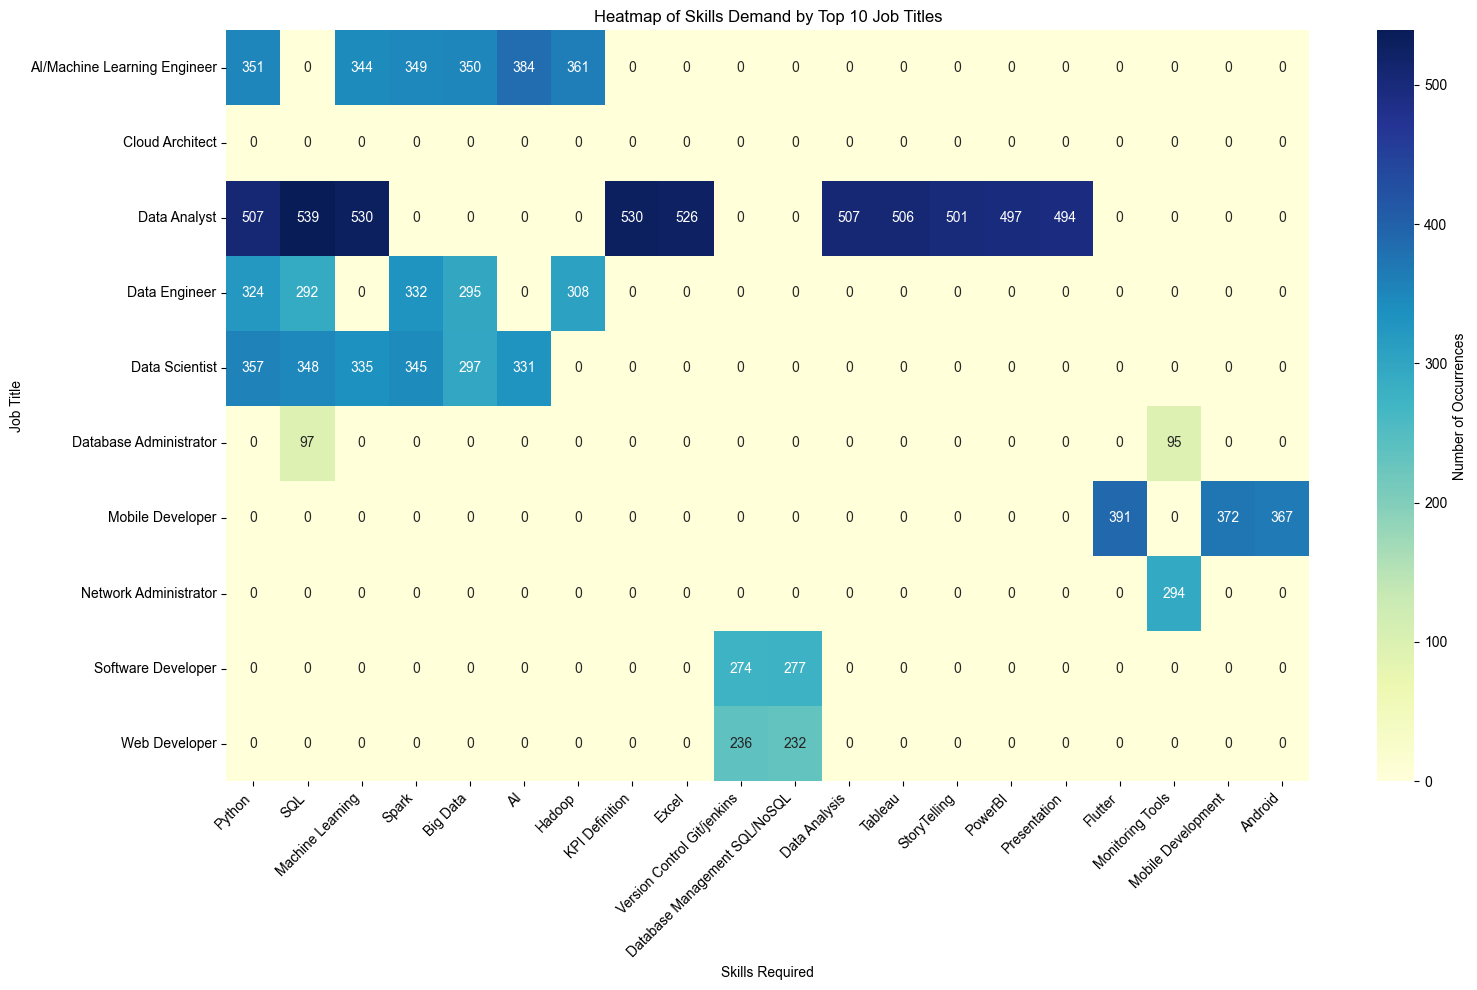

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# مسیر فایل دیتاست (تغییر دهید اگر لازم است)
file_path = 'skills_exploded_for_tableau.xlsx'

# خواندن دیتاست
df = pd.read_excel(file_path, sheet_name='Sheet1')

# انتخاب 10 شغل برتر بر اساس فرکانس (تعداد ردیف‌ها برای هر job_title)
top_jobs = df['job_title'].value_counts().head(10).index

# فیلتر دیتاست برای 10 شغل برتر
df_top = df[df['job_title'].isin(top_jobs)]

# Heatmap تقاضای مهارت‌ها بر اساس شغل (crosstab تعداد مهارت‌ها در هر شغل)
heatmap_data = pd.crosstab(df_top['job_title'], df_top['skills_required'])

# انتخاب مهارت‌های برتر (برای کاهش شلوغی، 20 مهارت برتر را انتخاب می‌کنیم)
top_skills = df_top['skills_required'].value_counts().head(20).index
heatmap_data = heatmap_data[top_skills]

# رسم Heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Number of Occurrences'})
plt.title('Heatmap of Skills Demand by Top 10 Job Titles')
plt.xlabel('Skills Required')
plt.ylabel('Job Title')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('skills_demand_heatmap_top10_jobs.png')
plt.show()

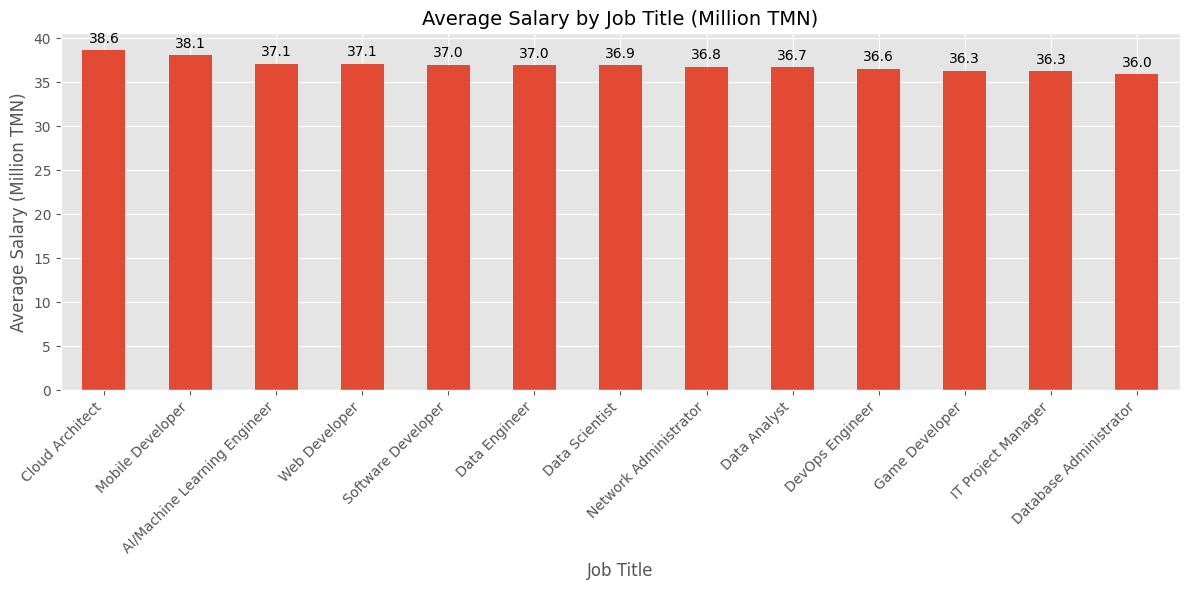

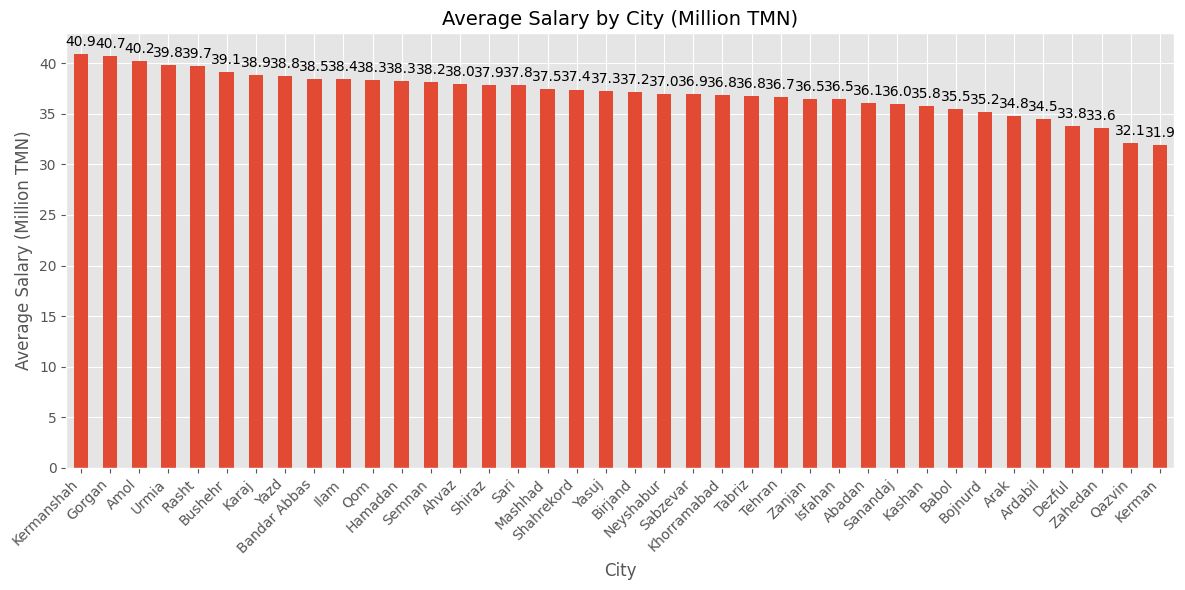

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# مسیر فایل دیتاست
file_path = r'D:\project\project3\Dataset\Project3_Dataset_cleaned.xlsx'

# خواندن دیتاست
df = pd.read_excel(file_path, sheet_name='Sheet1')

# محاسبه میانگین حقوق بر اساس شغل
mean_salary_by_job = df.groupby('job_title')['salary_million_tmn'].mean().sort_values(ascending=False)

# محاسبه میانگین حقوق بر اساس شهر
mean_salary_by_city = df.groupby('city')['salary_million_tmn'].mean().sort_values(ascending=False)

# تنظیم سبک نمودار (استفاده از سبک داخلی ggplot)
plt.style.use('ggplot')

# نمودار میله‌ای برای میانگین حقوق بر اساس شغل
plt.figure(figsize=(12, 6))
bars_job = mean_salary_by_job.plot(kind='bar')
plt.title('Average Salary by Job Title (Million TMN)', fontsize=14)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Average Salary (Million TMN)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# افزودن لیبل به میله‌ها برای شغل
for bar in bars_job.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{bar.get_height():.1f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('average_salary_by_job.png')
plt.show()

# نمودار میله‌ای برای میانگین حقوق بر اساس شهر
plt.figure(figsize=(12, 6))
bars_city = mean_salary_by_city.plot(kind='bar')
plt.title('Average Salary by City (Million TMN)', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Salary (Million TMN)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# افزودن لیبل به میله‌ها برای شهر
for bar in bars_city.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{bar.get_height():.1f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('average_salary_by_city.png')
plt.show()

In [9]:
import pandas as pd
import plotly.express as px

# مسیر فایل دیتاست
file_path = r'D:\project\project3\Dataset\Project3_Dataset_cleaned.xlsx'

# خواندن دیتاست
df = pd.read_excel(file_path, sheet_name='Sheet1')

# نمودار جعبه‌ای برای توزیع حقوق بر اساس شغل
fig_job = px.box(df, x='job_title', y='salary_million_tmn', title='Salary Distribution by Job Title (Million TMN)',
                 labels={'salary_million_tmn': 'Salary (Million TMN)', 'job_title': 'Job Title'},
                 height=600, width=1000)
fig_job.update_layout(xaxis={'tickangle': 45}, showlegend=False)
fig_job.write_html('salary_distribution_by_job.html')
fig_job.show()

# نمودار جعبه‌ای برای توزیع حقوق بر اساس شهر
fig_city = px.box(df, x='city', y='salary_million_tmn', title='Salary Distribution by City (Million TMN)',
                  labels={'salary_million_tmn': 'Salary (Million TMN)', 'city': 'City'},
                  height=600, width=1000)
fig_city.update_layout(xaxis={'tickangle': 45}, showlegend=False)
fig_city.write_html('salary_distribution_by_city.html')
fig_city.show()

C:\Users\mdrd\AppData\Local\Temp\ipykernel_4440\3866459369.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


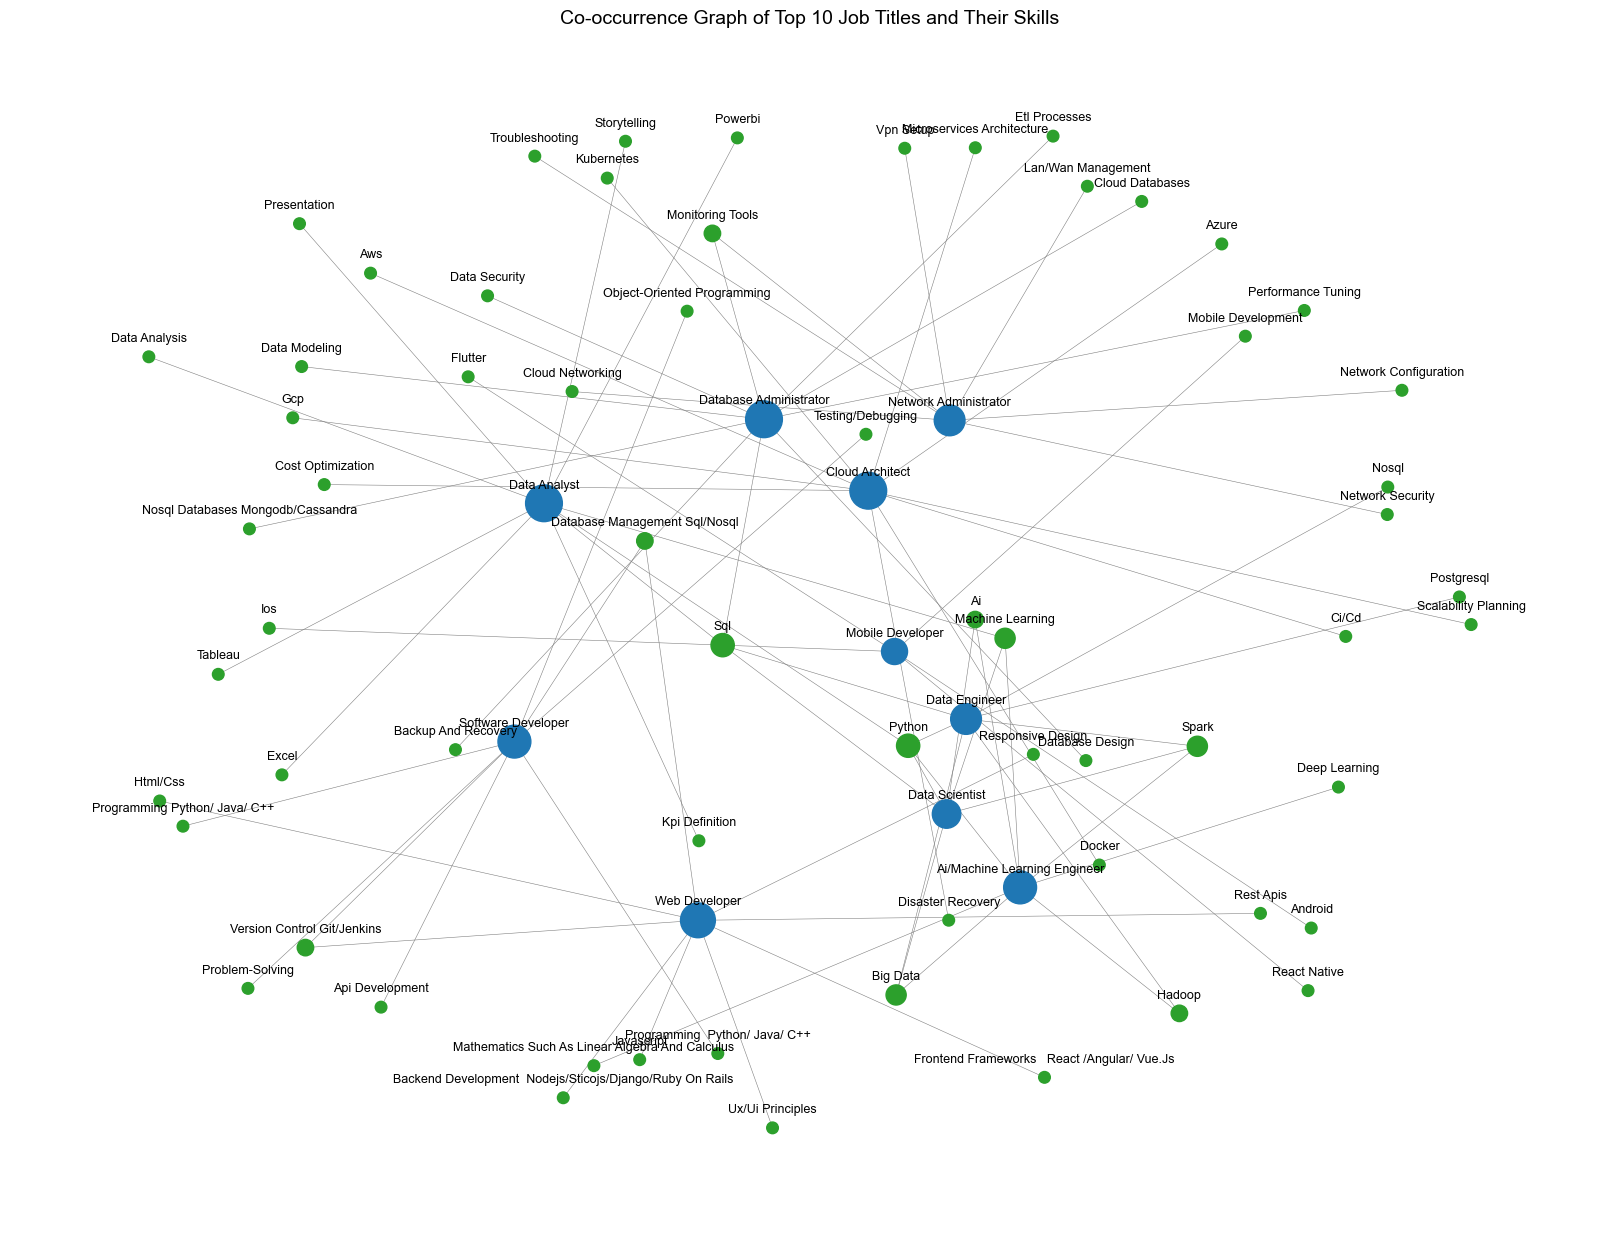

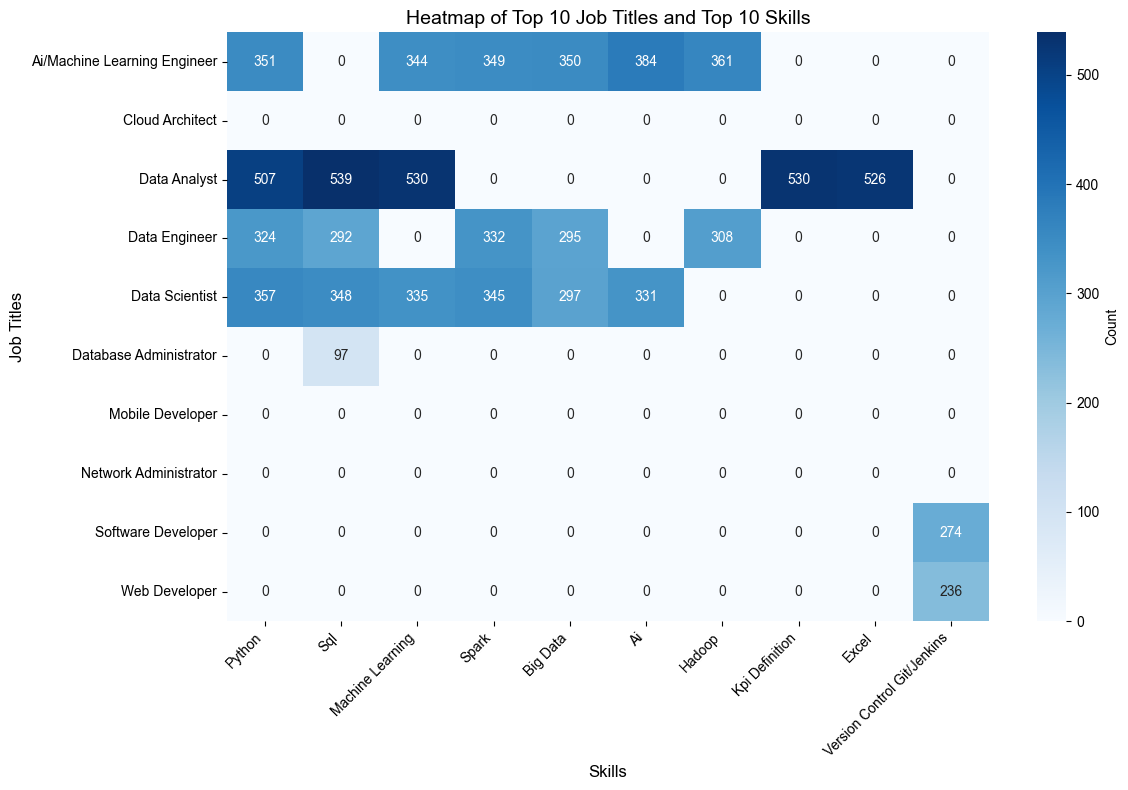

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import seaborn as sns
import numpy as np

# تنظیم فونت انگلیسی برای خوانایی
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10

# بارگذاری داده‌ها
df = pd.read_excel(r'./skills_exploded_for_tableau_cleaned.xlsx')

# پیدا کردن 10 عنوان شغلی برتر
top_10_jobs = df['job_title'].value_counts().head(10).index

# فیلتر کردن داده‌ها برای 10 شغل برتر
df_filtered = df[df['job_title'].isin(top_10_jobs)]

# --- بخش 1: گراف هم‌رخدادی ---
# ایجاد گراف دو بخشی
G = nx.Graph()

# اضافه کردن گره‌ها (مشاغل و مهارت‌ها)
jobs = set(df_filtered['job_title'].dropna())
skills = set(df_filtered['skills_required'])

G.add_nodes_from(jobs, bipartite=0)  # گره‌های مشاغل
G.add_nodes_from(skills, bipartite=1)  # گره‌های مهارت‌ها

# اضافه کردن یال‌ها (فقط بین مشاغل و مهارت‌ها)
for _, row in df_filtered.iterrows():
    if pd.notna(row['job_title']) and pd.notna(row['skills_required']):
        if row['job_title'] in jobs and row['skills_required'] in skills:
            G.add_edge(row['job_title'], row['skills_required'])

# تنظیم چیدمان گراف برای خوانایی
pos = nx.spring_layout(G, k=0.7, iterations=50, scale=2)  # k بیشتر برای فاصله گره‌ها

# تنظیم اندازه و رنگ گره‌ها
node_sizes = [G.degree(node) * 70 for node in G.nodes()]  # اندازه کوچکتر برای خوانایی
node_colors = ['#1f77b4' if node in jobs else '#2ca02c' for node in G.nodes()]

# رسم گراف بدون لیبل اولیه
plt.figure(figsize=(16, 12))  # ابعاد بزرگ‌تر
nx.draw(
    G,
    pos=pos,
    with_labels=False,  # غیرفعال کردن لیبل اولیه برای جلوگیری از تکرار
    node_color=node_colors,
    node_size=node_sizes,
    edge_color='gray',
    width=0.4
)

# رسم لیبل‌ها فقط یک بار با جابجایی
label_pos = {k: [v[0], v[1] + 0.07] for k, v in pos.items()}
nx.draw_networkx_labels(G, label_pos, font_size=9, font_family='Arial')

plt.title('Co-occurrence Graph of Top 10 Job Titles and Their Skills', fontsize=14)
plt.tight_layout()
plt.savefig('top_10_jobs_skills_graph.png', dpi=300, bbox_inches='tight')
plt.show()

# --- بخش 2: هیت‌مپ ---
# ایجاد ماتریس هم‌رخدادی
pivot_table = df_filtered.pivot_table(index='job_title', columns='skills_required', aggfunc='size', fill_value=0)

# محدود کردن به 10 مهارت برتر برای خوانایی
top_skills = df_filtered['skills_required'].value_counts().head(10).index
pivot_table = pivot_table[top_skills]

# رسم هیت‌مپ
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Heatmap of Top 10 Job Titles and Top 10 Skills', fontsize=14)
plt.xlabel('Skills', fontsize=12)
plt.ylabel('Job Titles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('job_skills_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

Top 10 Central Nodes based on Degree Centrality:
Database Administrator: 0.1389
Data Analyst: 0.1389
Cloud Architect: 0.1389
Web Developer: 0.1250
Ai/Machine Learning Engineer: 0.1111
Software Developer: 0.1111
Network Administrator: 0.0972
Data Engineer: 0.0972
Data Scientist: 0.0833
Mobile Developer: 0.0694


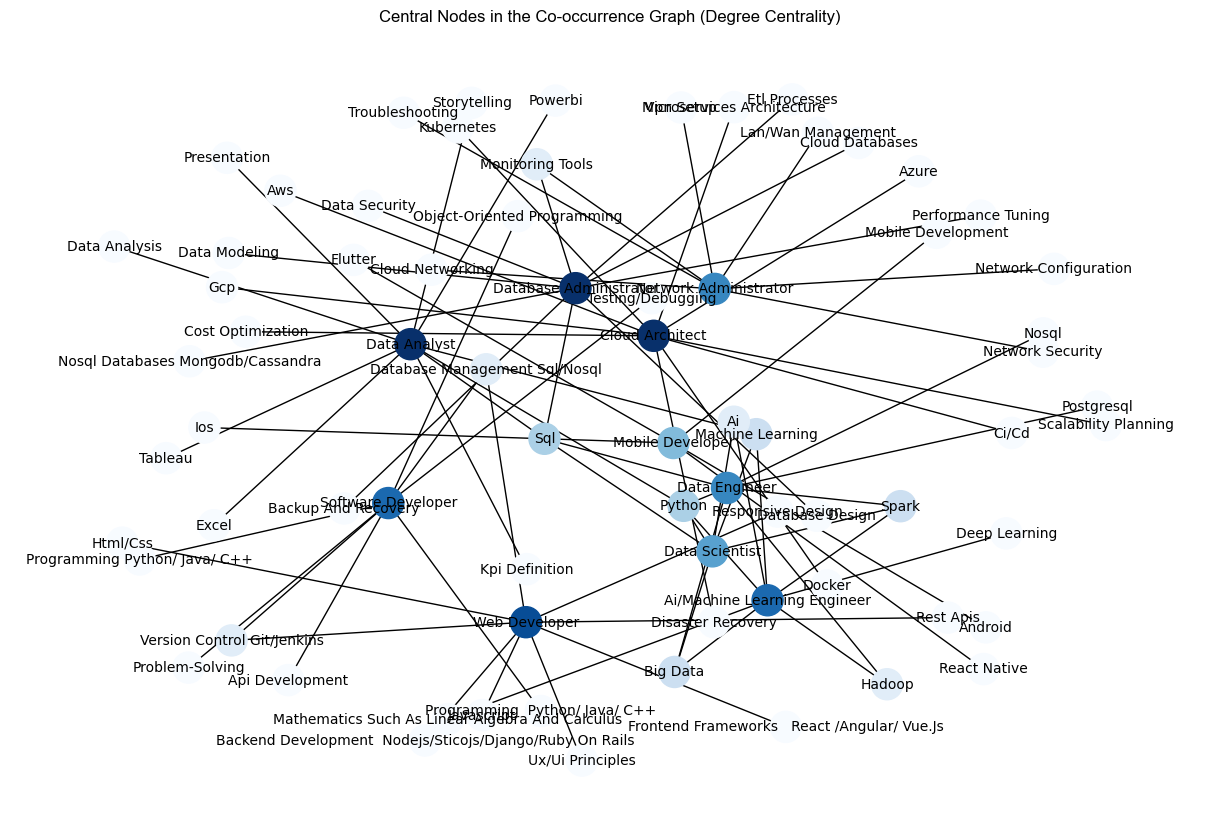

In [4]:
# محاسبه درجه گره‌ها (Degree Centrality)
degree_centrality = nx.degree_centrality(G)

# نمایش 10 گره با بیشترین درجه
central_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# چاپ نتایج
print("Top 10 Central Nodes based on Degree Centrality:")
for node, centrality in central_nodes:
    print(f"{node}: {centrality:.4f}")

# رسم گراف با رنگ‌بندی گره‌های پراتصال
node_colors = [degree_centrality[node] for node in G.nodes()]
plt.figure(figsize=(12, 8))
nx.draw(G, pos=pos, with_labels=True, node_color=node_colors, cmap=plt.cm.Blues, node_size=500, font_size=10)
plt.title('Central Nodes in the Co-occurrence Graph (Degree Centrality)')
plt.show()


Detected Communities:
{'Lan/Wan Management', 'Database Administrator', 'Network Administrator', 'Data Modeling', 'Data Security', 'Cloud Databases', 'Troubleshooting', 'Cloud Networking', 'Backup And Recovery', 'Network Security', 'Performance Tuning', 'Network Configuration', 'Nosql Databases Mongodb/Cassandra', 'Vpn Setup', 'Etl Processes', 'Monitoring Tools', 'Database Design'}
{'Kpi Definition', 'Ai/Machine Learning Engineer', 'Postgresql', 'Python', 'Data Engineer', 'Tableau', 'Data Scientist', 'Machine Learning', 'Presentation', 'Big Data', 'Storytelling', 'Deep Learning', 'Nosql', 'Powerbi', 'Ai', 'Excel', 'Data Analyst', 'Sql', 'Mathematics Such As Linear Algebra And Calculus', 'Spark', 'Data Analysis', 'Hadoop'}
{'Version Control Git/Jenkins', 'Testing/Debugging', 'Html/Css', 'Programming Python/ Java/ C++', 'Api Development', 'Javascript', 'Responsive Design', 'Software Developer', 'Programming  Python/ Java/ C++', 'Ux/Ui Principles', 'Object-Oriented Programming', 'Rest Apis

C:\Users\mdrd\AppData\Local\Temp\ipykernel_4440\1595438549.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.get_cmap("tab10"), node_size=500, font_size=10, font_weight='bold')


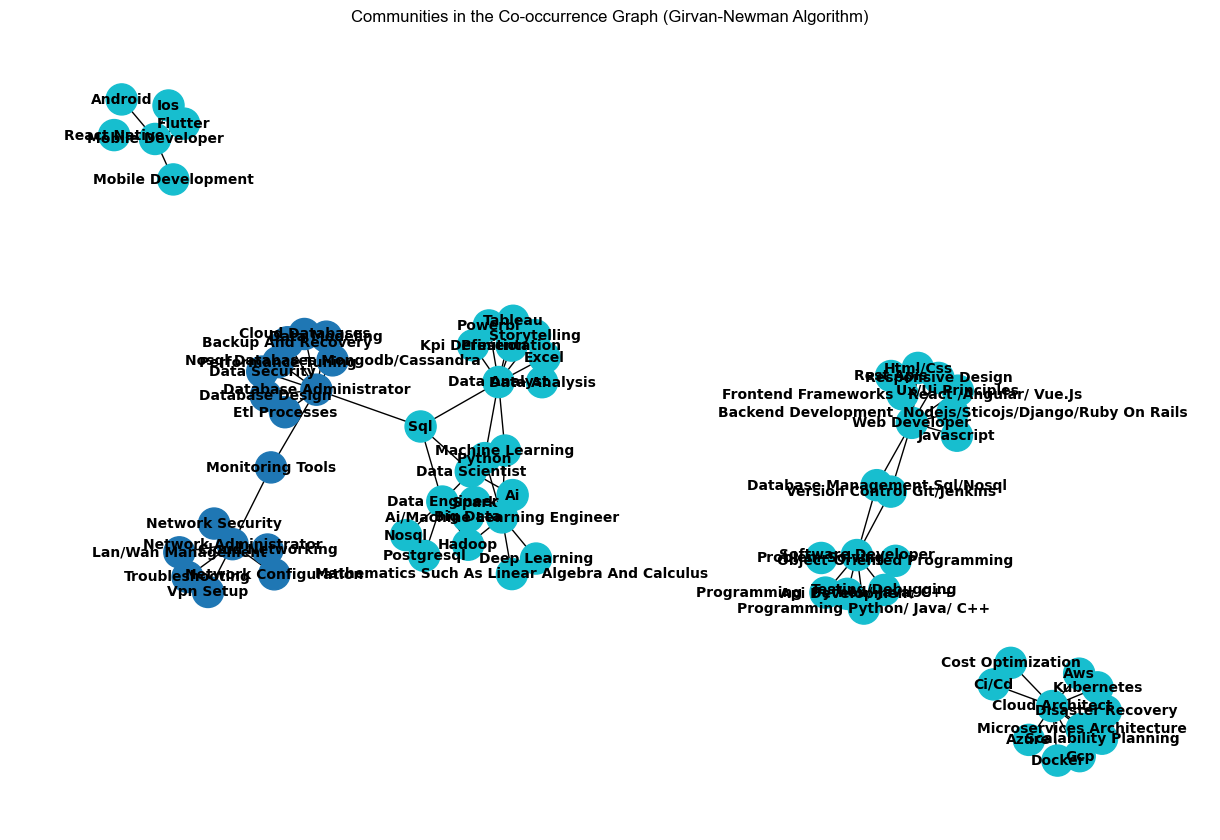

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# فرض می‌کنیم که گراف G از قبل ساخته شده باشد

# استفاده از الگوریتم Girvan-Newman برای شناسایی جوامع
from networkx.algorithms.community import girvan_newman

# الگوریتم Girvan-Newman به دنبال جدا کردن جوامع است
communities_generator = girvan_newman(G)

# گرفتن اولین تقسیم‌بندی جوامع
first_community = next(communities_generator)

# چاپ جوامع
print("Detected Communities:")
for community in first_community:
    print(community)

# رسم گراف با رنگ‌بندی جوامع
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
colors = [0 if node in first_community[0] else 1 for node in G.nodes()]

# رسم گراف با رنگ‌بندی جوامع
nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.get_cmap("tab10"), node_size=500, font_size=10, font_weight='bold')
plt.title('Communities in the Co-occurrence Graph (Girvan-Newman Algorithm)')
plt.show()


Shortest path between 'Data Scientist' and 'Python':
['Data Scientist', 'Python']


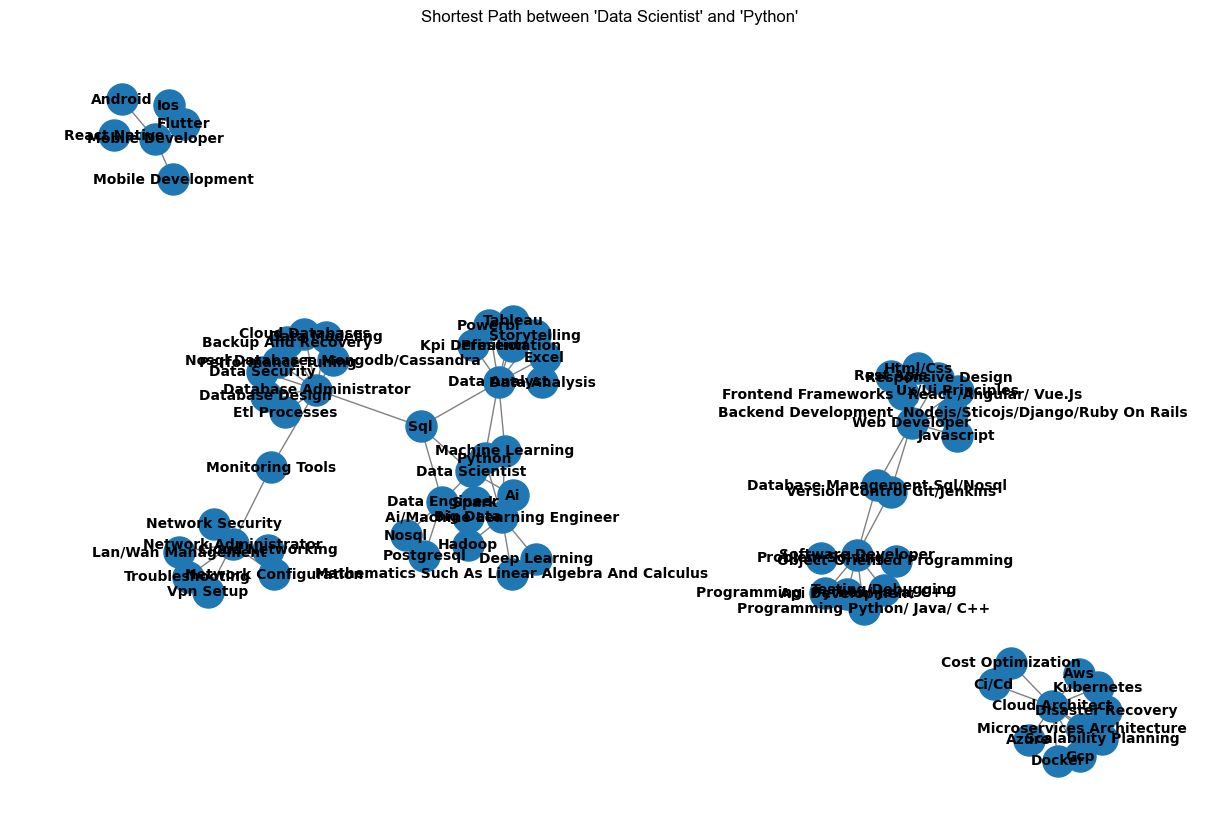

In [ ]:
# فرض می‌کنیم که گراف G از قبل ساخته شده باشد

# شناسایی کوتاه‌ترین مسیر بین دو گره خاص (مثلاً بین یک شغل خاص و یک مهارت خاص)
shortest_path = nx.shortest_path(G, source='Data Scientist', target='Python')

# چاپ مسیر کوتاه‌ترین مسیر
print("Shortest path between 'Data Scientist' and 'Python':")
print(shortest_path)

# نمایش مسیر در گراف
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

# گرافی که فقط مسیر کوتاه را نشان می‌دهد
edges_in_path = list(zip(shortest_path, shortest_path[1:]))
nx.draw(G, pos, with_labels=True, node_size=500, font_size=10, font_weight='bold', edge_color='gray')

# نمایش یال‌های مسیر کوتاه
nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color='r', width=2)

plt.title("Shortest Path between 'Data Scientist' and 'Python'")
plt.show()


In [22]:
import plotly.graph_objects as go
import networkx as nx

# فرض می‌کنیم که گراف G از قبل ساخته شده باشد
# استفاده از layout برای گراف
pos = nx.spring_layout(G, seed=42)  # برای مرتب‌سازی گره‌ها

# استخراج موقعیت‌های گره‌ها
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_y.append(y0)
    edge_y.append(y1)

# استخراج موقعیت‌های گره‌ها
node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

# رسم گراف تعاملی با Plotly
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',  # اصلاح شده: افزودن برچسب‌ها
    hoverinfo='text',
    text=list(G.nodes()),  # برچسب‌ها
    textposition="top center",  # موقعیت برچسب‌ها
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
        )
    )
)

# برای گره‌ها، اضافه کردن اطلاعات به هنگام موس‌رو
node_adjacencies = []
node_text = []
for node in G.nodes():
    node_adjacencies.append(len(list(G.neighbors(node))))
    node_text.append(f'# of connections: {len(list(G.neighbors(node)))}')

node_trace.marker.color = node_adjacencies
node_trace.marker.size = node_adjacencies

# رسم نمودار نهایی
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Interactive Co-occurrence Graph of Skills and Jobs',
                    title_font_size=16,  
                    showlegend=False,
                    hovermode='closest',
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)
                ))

fig.show()


In [23]:
# محاسبه درجه گره‌ها (Degree Centrality)
degree_centrality = nx.degree_centrality(G)

# نمایش 10 گره با بیشترین درجه
central_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# چاپ نتایج
print("Top 10 Central Nodes based on Degree Centrality:")
for node, centrality in central_nodes:
    print(f"{node}: {centrality:.4f}")


Top 10 Central Nodes based on Degree Centrality:
Database Administrator: 0.1389
Data Analyst: 0.1389
Cloud Architect: 0.1389
Web Developer: 0.1250
Ai/Machine Learning Engineer: 0.1111
Software Developer: 0.1111
Network Administrator: 0.0972
Data Engineer: 0.0972
Data Scientist: 0.0833
Mobile Developer: 0.0694


In [24]:
# استفاده از الگوریتم Girvan-Newman برای شناسایی جوامع
from networkx.algorithms.community import girvan_newman

# الگوریتم Girvan-Newman به دنبال جدا کردن جوامع است
communities_generator = girvan_newman(G)

# گرفتن اولین تقسیم‌بندی جوامع
first_community = next(communities_generator)

# چاپ جوامع
print("Detected Communities:")
for community in first_community:
    print(community)


Detected Communities:
{'Lan/Wan Management', 'Database Administrator', 'Network Administrator', 'Data Modeling', 'Data Security', 'Cloud Databases', 'Troubleshooting', 'Cloud Networking', 'Backup And Recovery', 'Network Security', 'Performance Tuning', 'Network Configuration', 'Nosql Databases Mongodb/Cassandra', 'Vpn Setup', 'Etl Processes', 'Monitoring Tools', 'Database Design'}
{'Kpi Definition', 'Ai/Machine Learning Engineer', 'Postgresql', 'Python', 'Data Engineer', 'Tableau', 'Data Scientist', 'Machine Learning', 'Presentation', 'Big Data', 'Storytelling', 'Deep Learning', 'Nosql', 'Powerbi', 'Ai', 'Excel', 'Data Analyst', 'Sql', 'Mathematics Such As Linear Algebra And Calculus', 'Spark', 'Data Analysis', 'Hadoop'}
{'Version Control Git/Jenkins', 'Testing/Debugging', 'Html/Css', 'Programming Python/ Java/ C++', 'Api Development', 'Javascript', 'Responsive Design', 'Software Developer', 'Programming  Python/ Java/ C++', 'Ux/Ui Principles', 'Object-Oriented Programming', 'Rest Apis

In [25]:
# شناسایی کوتاه‌ترین مسیر بین دو گره خاص (مثلاً بین یک شغل خاص و یک مهارت خاص)
shortest_path = nx.shortest_path(G, source='Data Scientist', target='Python')

# چاپ مسیر کوتاه‌ترین مسیر
print("Shortest path between 'Data Scientist' and 'Python':")
print(shortest_path)


Shortest path between 'Data Scientist' and 'Python':
['Data Scientist', 'Python']


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import networkx as nx
import numpy as np
from itertools import combinations

# مسیر فایل دیتاست
file_path = 'skills_exploded_for_tableau_cleaned.xlsx'

# خواندن دیتاست
df = pd.read_excel(file_path, sheet_name='Sheet1')

# فیلتر کردن آگهی‌های منحصربه‌فرد و استخراج مهارت‌ها
unique_jobs = df.drop_duplicates(subset=['job_id'])
skills_per_job = unique_jobs.groupby('job_id')['skills_required'].apply(set).reset_index()

# انتخاب 10 مهارت برتر بر اساس فرکانس
top_skills = df['skills_required'].value_counts().head(10).index
print("Top 10 Skills:", list(top_skills))

# فیلتر مهارت‌ها به 10 مهارت برتر
skills_per_job = skills_per_job[skills_per_job['skills_required'].apply(lambda x: any(skill in x for skill in top_skills))]

# محاسبه هم‌رخدادی (تعداد آگهی‌های مشترک برای هر جفت مهارت)
co_occurrences = {}
for _, row in skills_per_job.iterrows():
    skills = [s for s in row['skills_required'] if s in top_skills]
    if len(skills) > 1:  # فقط اگر بیش از یک مهارت وجود دارد
        for skill1, skill2 in combinations(skills, 2):  # فقط جفت‌ها، بدون خودی
            pair = tuple(sorted([skill1, skill2]))
            co_occurrences[pair] = co_occurrences.get(pair, 0) + 1

print("Co-occurrences:", co_occurrences)
if not co_occurrences:
    print("No co-occurrences found. Check if skills overlap in jobs.")
    exit()

# ایجاد گراف با networkx
G = nx.Graph()
for pair, count in co_occurrences.items():
    G.add_edge(pair[0], pair[1], weight=count)

# چیدمان گراف با spring_layout
pos = nx.spring_layout(G, seed=42, k=0.5, iterations=50)  # seed برای تکرارپذیری
print("Number of Nodes:", G.number_of_nodes())
print("Number of Edges:", G.number_of_edges())

# استخراج موقعیت‌های گره‌ها و یال‌ها
edge_x = []
edge_y = []
weights = []
for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    weight = edge[2].get('weight', 1)  # وزن پیش‌فرض 1 اگر وجود نداشت
    weights.append(weight)

# مدیریت خطا برای وزن‌ها
weights = np.array(weights)
if weights.size == 0:
    print("No weights found. Graph cannot be rendered.")
    exit()
if np.any(np.isnan(weights)) or np.any(weights <= 0):
    weights = np.nan_to_num(weights, nan=1.0, posinf=1.0, neginf=1.0)  # جایگزینی NaN و بی‌نهایت‌ها

# نرمال‌سازی وزن‌ها برای رنگ‌بندی
norm_weights = (weights - weights.min()) / (weights.max() - weights.min() + 1e-10)  # +1e-10 برای جلوگیری از تقسیم بر صفر
edge_colors = ['rgb({}, {}, {})'.format(int(255 * norm), 0, int(255 * (1 - norm))) for norm in norm_weights]

# استخراج موقعیت‌های گره‌ها
node_x = [pos[node][0] for node in G.nodes()]
node_y = [pos[node][1] for node in G.nodes()]

# اطلاعات گره‌ها
node_adjacencies = []
node_text = []
for node in G.nodes():
    adjacencies = len(list(G.neighbors(node)))
    node_adjacencies.append(adjacencies)
    node_text.append(f'# of connections: {adjacencies}')

# رسم گراف وزن‌دار با Plotly
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=2, color=edge_colors),  # رنگ یال‌ها بر اساس وزن‌ها
    hoverinfo='none',
    mode='lines'
)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    text=node_text,
    textposition='top center',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=node_adjacencies,  # اندازه بر اساس تعداد اتصالات
        color=node_adjacencies,
        colorbar=dict(thickness=15, title='Node Connections', xanchor='left')
    )
)

# رسم نمودار نهایی
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Interactive Weighted Co-occurrence Graph of Skills and Jobs',
                    title_font_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)
                ))
fig.write_html('skills_cooccurrence_network.html')
fig.show()

Top 10 Skills: ['Python', 'Sql', 'Machine Learning', 'Spark', 'Big Data', 'Ai', 'Hadoop', 'Kpi Definition', 'Excel', 'Version Control Git/Jenkins']
Co-occurrences: {}
No co-occurrences found. Check if skills overlap in jobs.
Number of Nodes: 0
Number of Edges: 0
No weights found. Graph cannot be rendered.


ValueError: zero-size array to reduction operation minimum which has no identity

: 